# Algoritmo Fuzzy C Means

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Testes com o algoritmo](#testes-com-o-algoritmo)
- [Aplicando o algoritmo Fuzzy C Means](#implementação-do-algoritmo)

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from utils.alterar_dataset import despivotear_dataset, multi_indexar_dataset
from sklearn.model_selection import train_test_split
from utils.pegarsubstring import renomear_series
from utils.parametros import ParametrosCmeans
from matplotlib import pyplot as plt
from fcmeans import FCM
import seaborn as sns
import pandas as pd
import numpy as np

## Importando datasets

In [8]:
df_funcao_renal = pd.read_csv("../databases/raw/InputFuncaoRenal.csv", sep = ",", index_col = "subject_id")
df_dieta_grupos = pd.read_csv("../databases/raw/dva_dieta_grupos.csv", sep = ",", index_col = "subject_id")
df_perfil_hepatico = pd.read_csv("../databases/raw/InputPerfilHepatico.csv", sep = ",", index_col = "subject_id")
df_ureia = pd.read_csv("../databases/processed/ureia_pivoted.csv", sep = ",", index_col = "subject_id")
df_creatinina = pd.read_csv("../databases/processed/creatinina_pivoted.csv", sep = ",", index_col = "subject_id")

## Testes com o Algoritmo

In [9]:
lista_qtd_clusters = [i for i in range(2, 14)]

### DATASET Funcao Renal

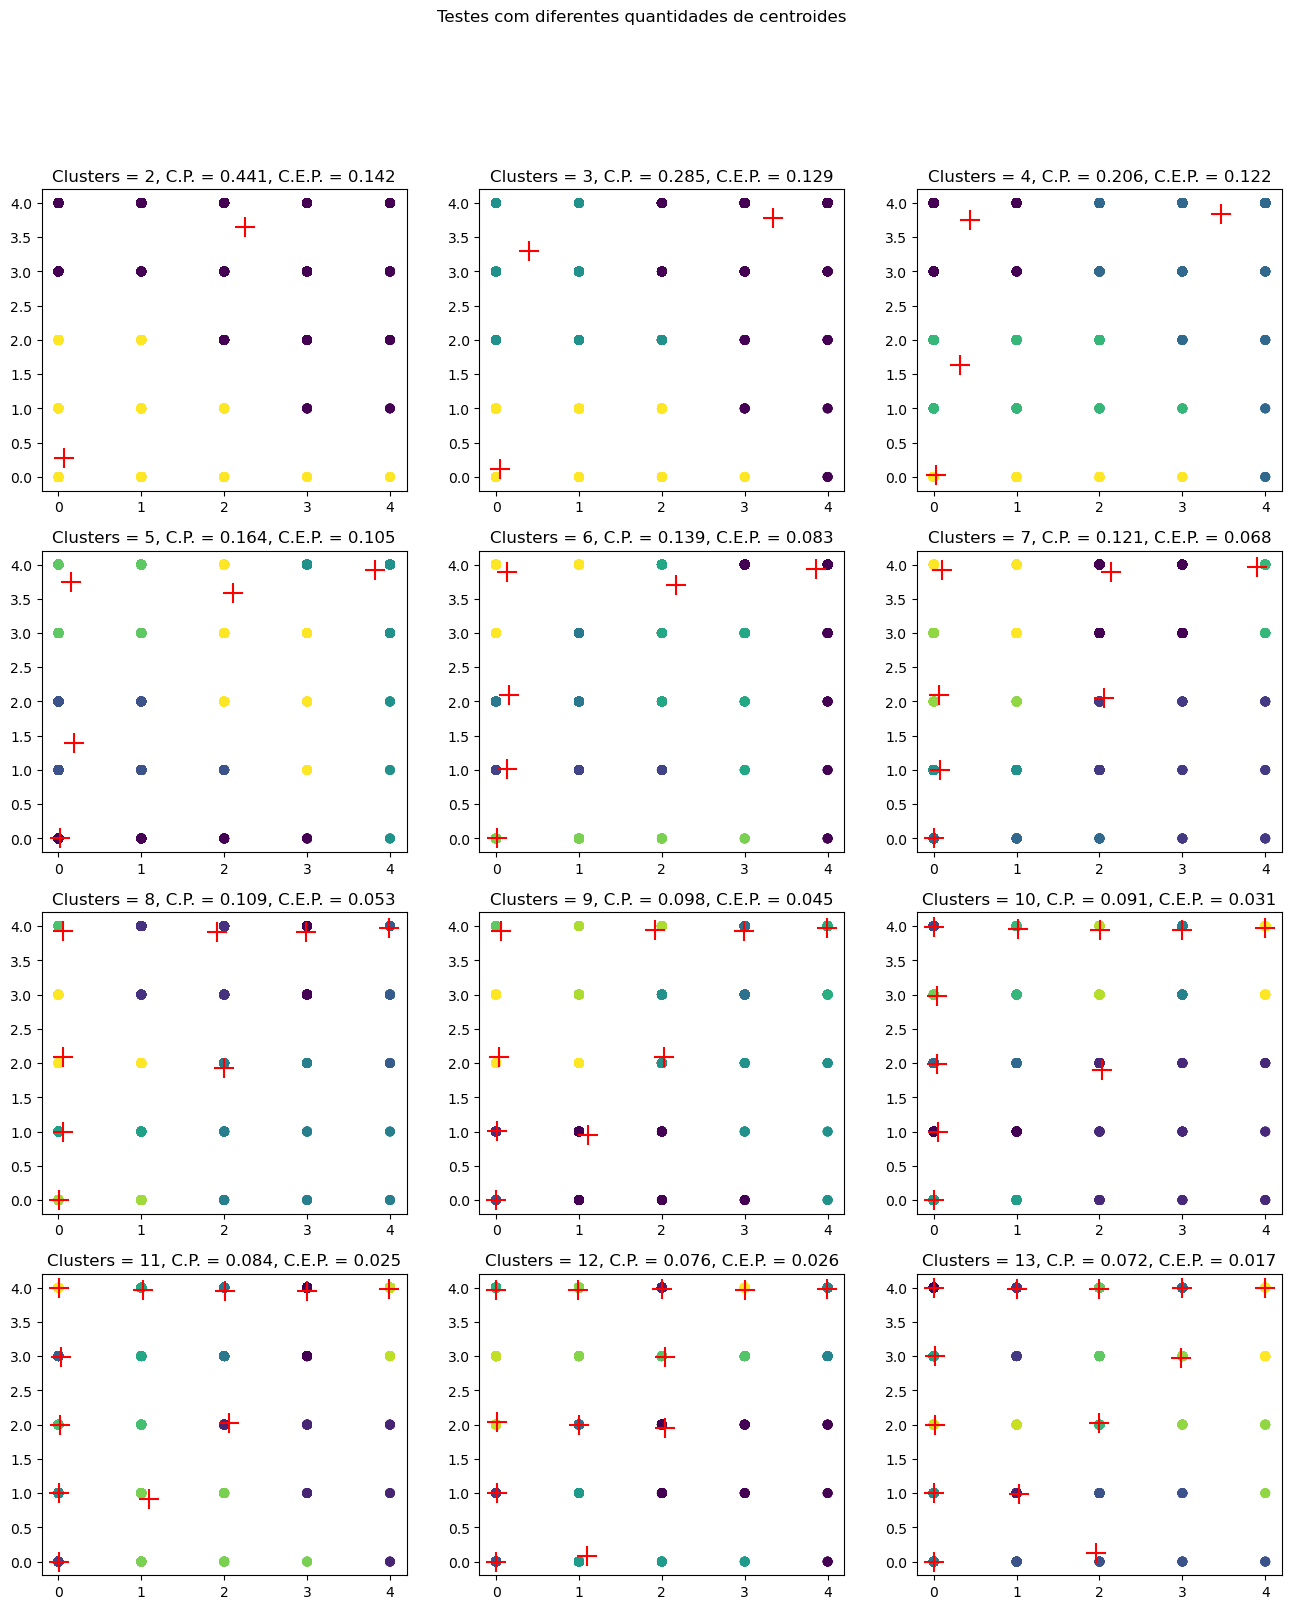

In [5]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.441 e C.E.P. = 0.142.

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:172: RuntimeWarning: invalid value encountered in divide
  return np.dot(A, B.T) / (p1*p2)


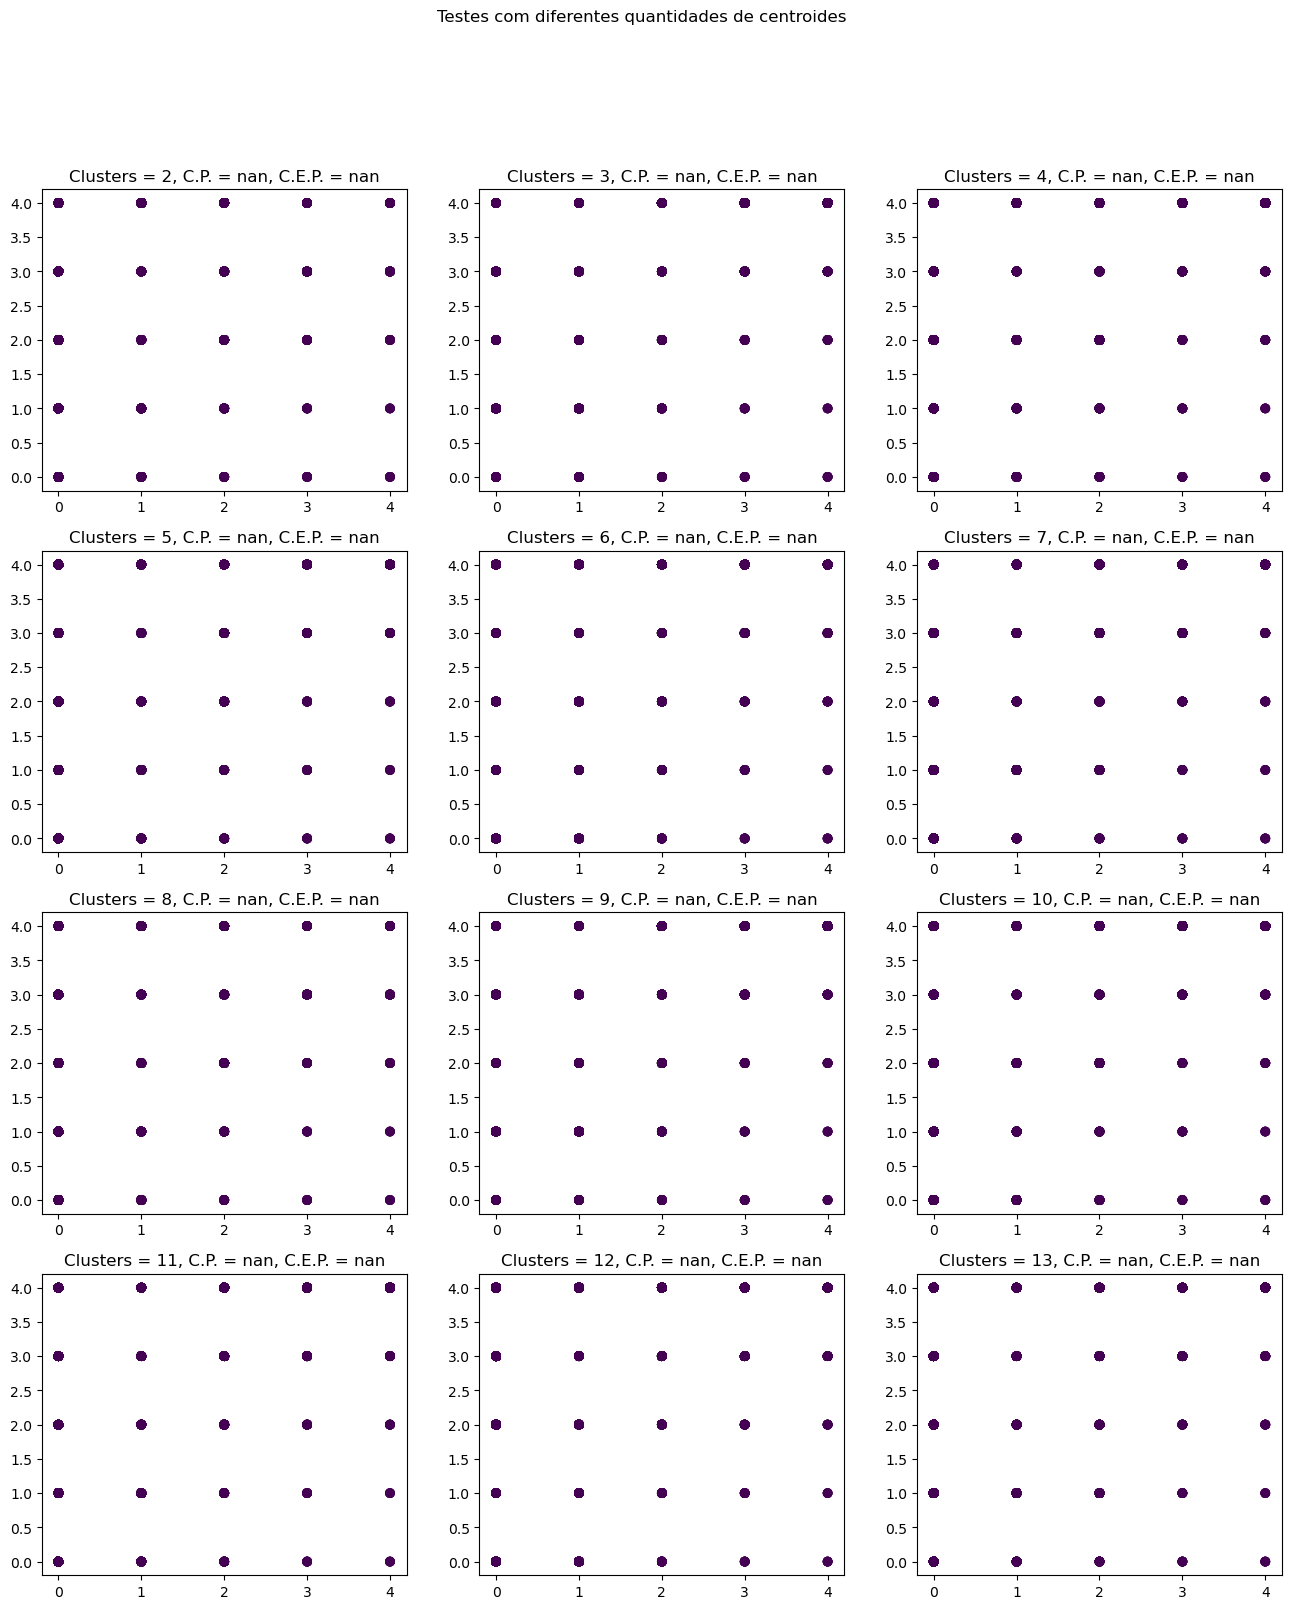

In [6]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima ocorre erro de divisão logo no começo das iterações. Isso não permite que nenhum gráfico seja impresso.

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:102: RuntimeWarning: divide by zero encountered in divide
  lambda data, col: (data[:, col] / data.T).sum(0)
/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:102: RuntimeWarning: invalid value encountered in divide
  lambda data, col: (data[:, col] / data.T).sum(0)


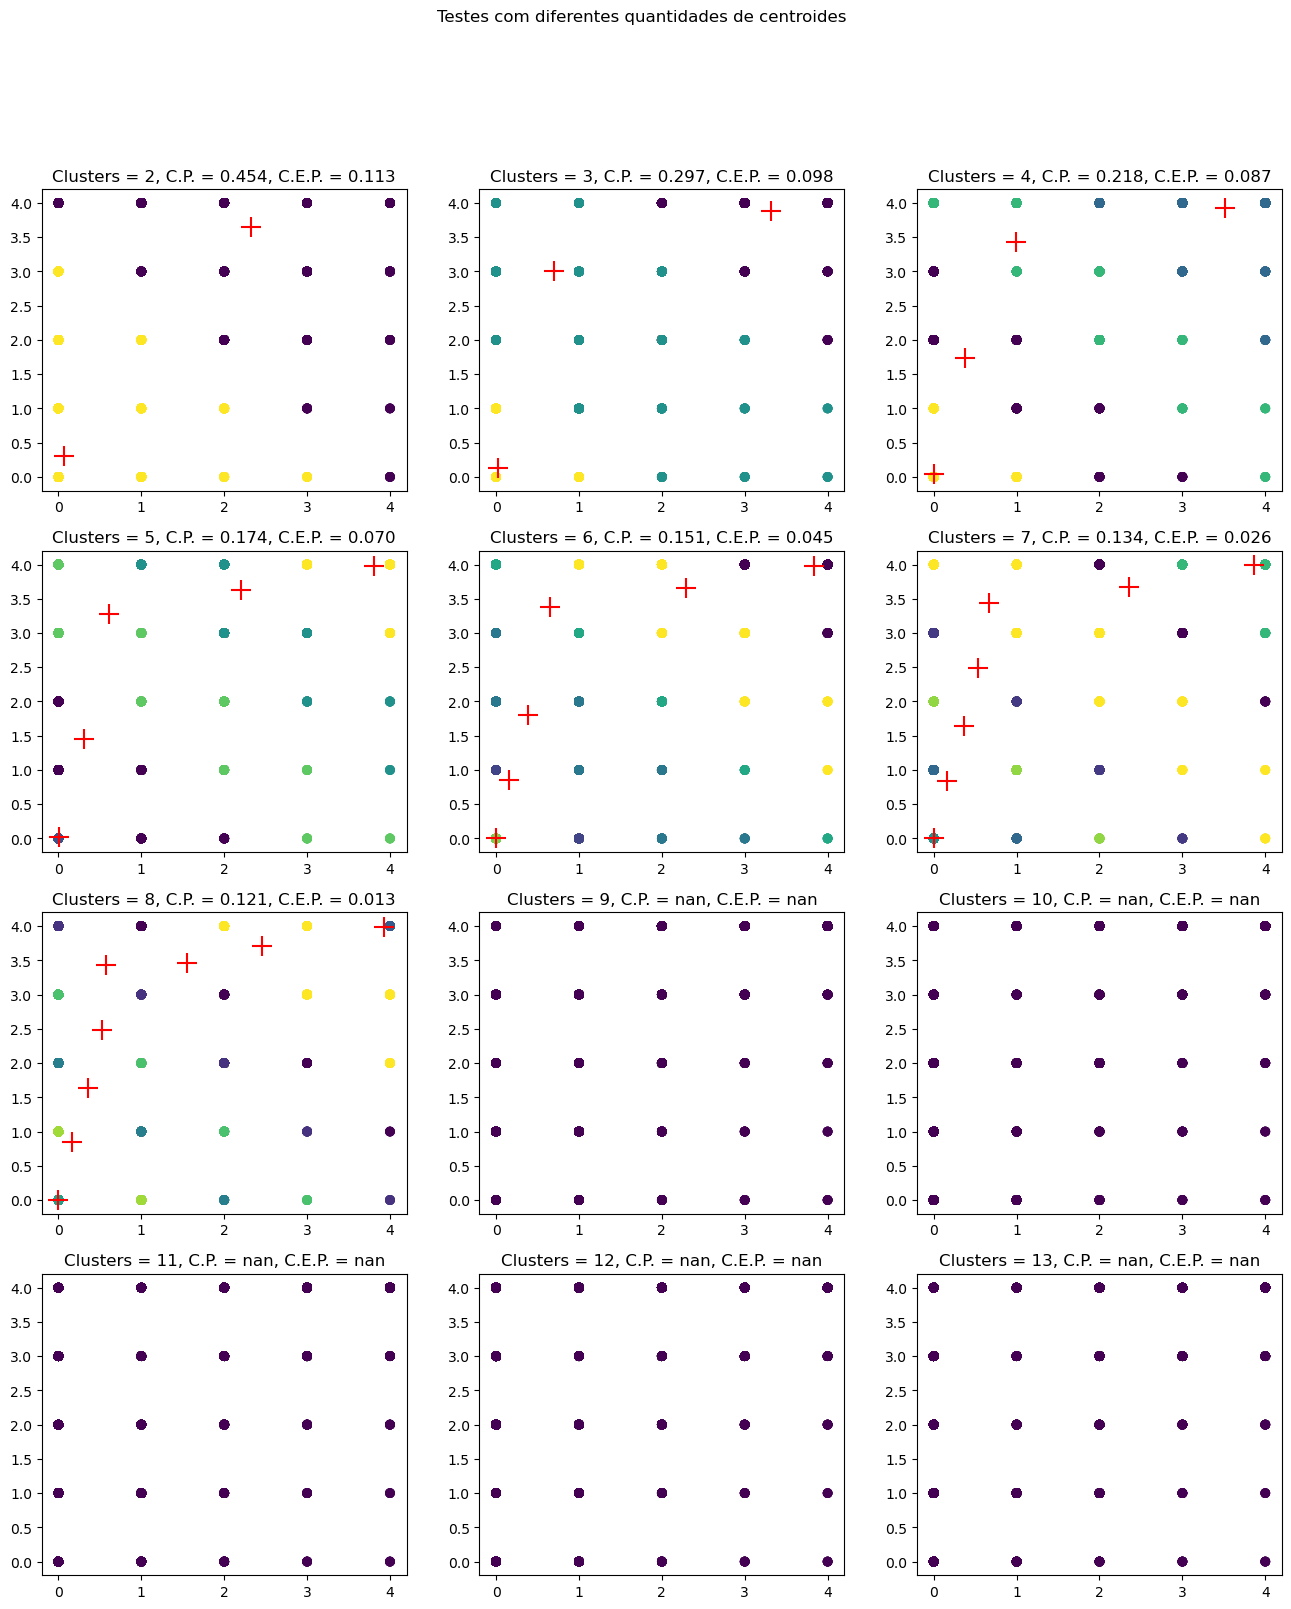

In [7]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.454 e C.E.P. = 0.113. No entanto, a partir de 9 centróides ocorre erro de divisão, o que impede a impressão dos resultados com outras quantidades de núcleos.

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:94: RuntimeWarning: invalid value encountered in power
  temp = FCM._dist(


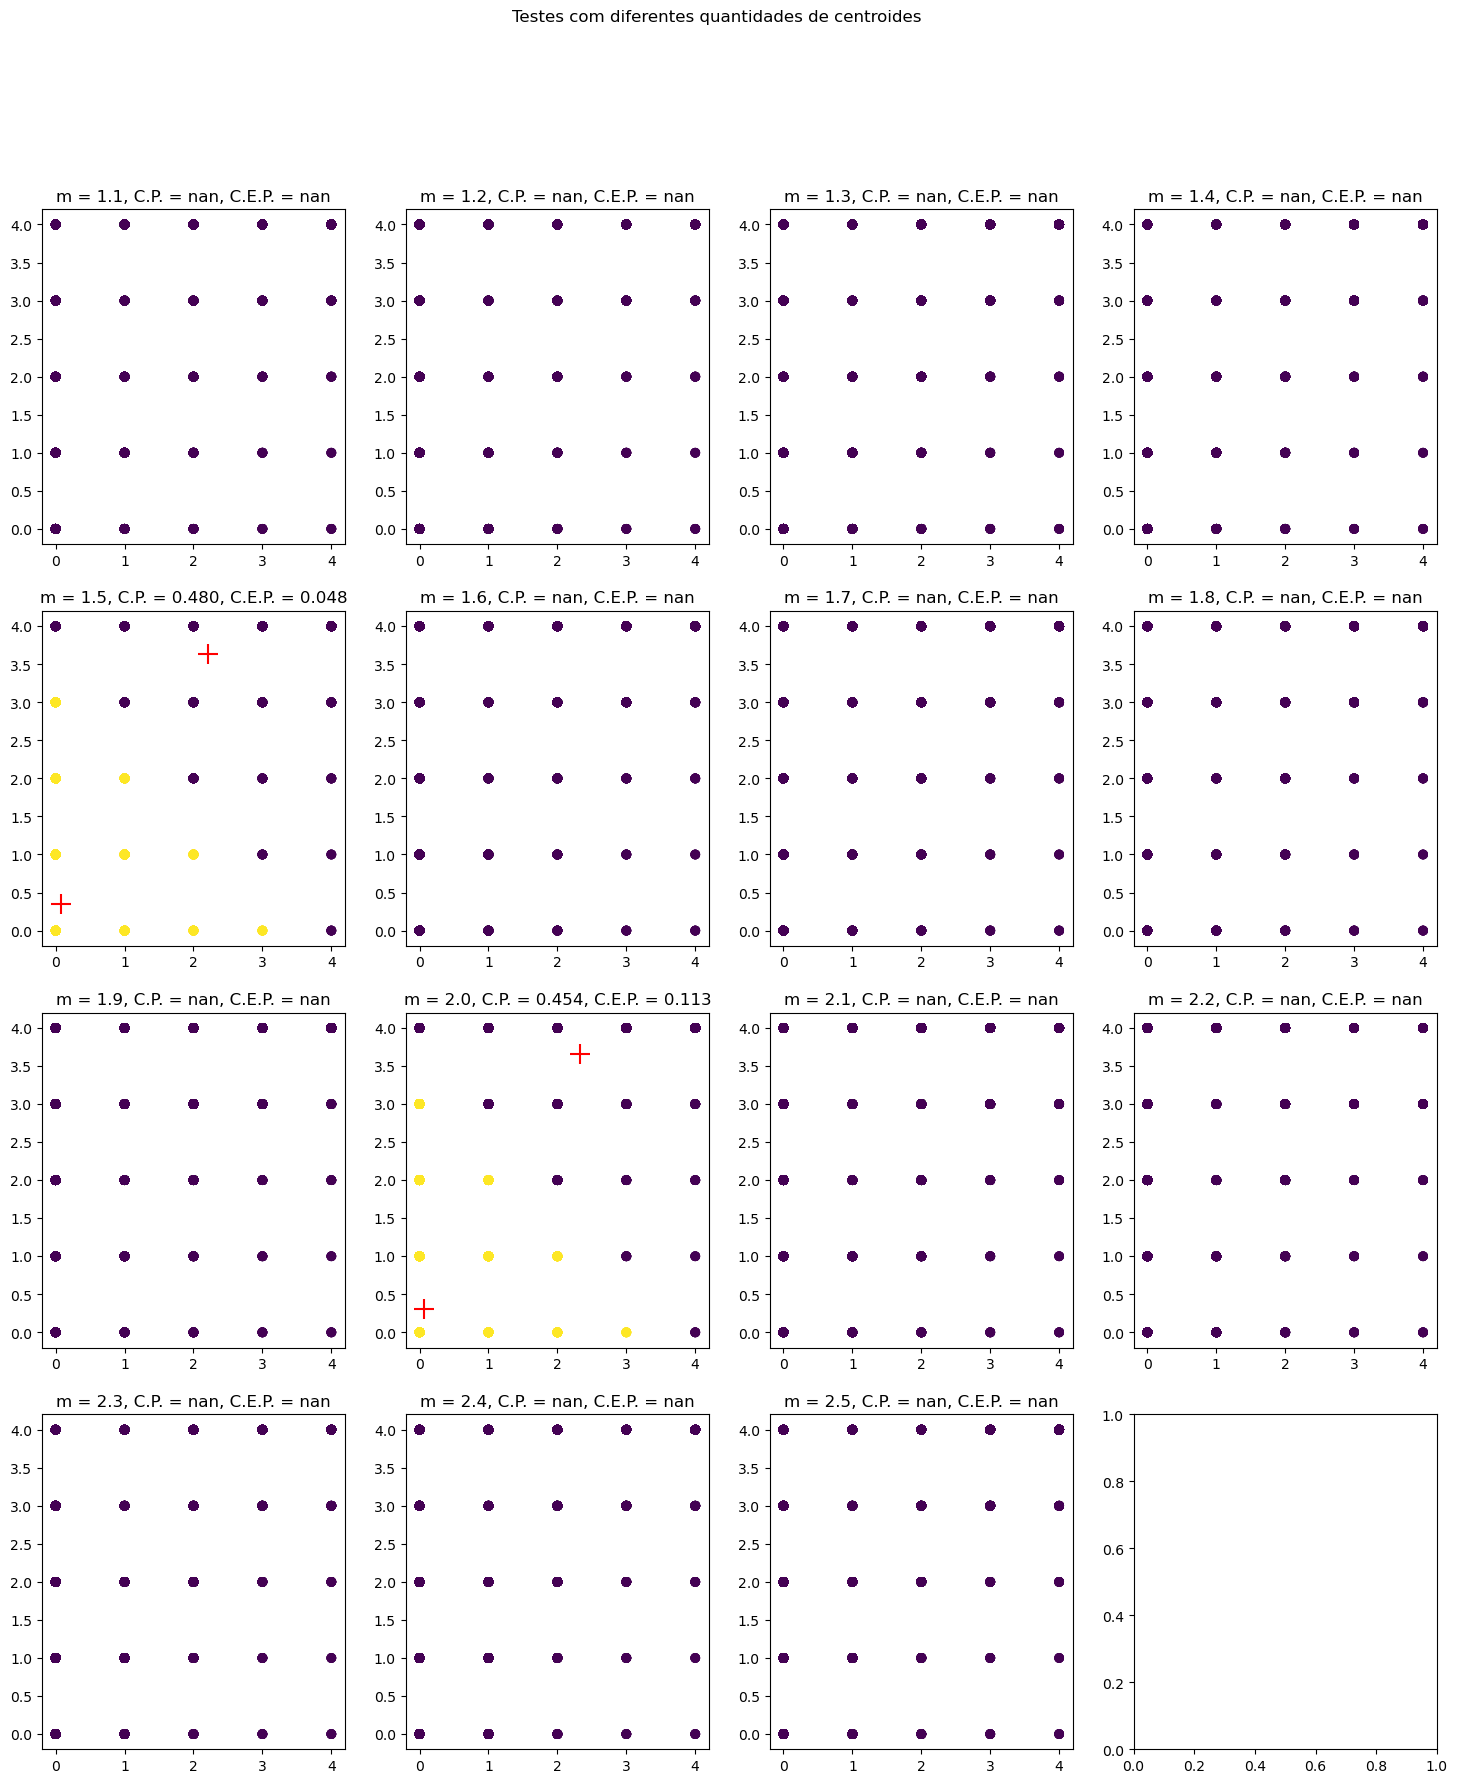

In [8]:
lista_parametros_fuzzy = [round(i, 1) for i in np.arange(1.1, 2.6, 0.1)]
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = parametro_fuzzy,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)
    
qtd_parametro_fuzzy = len(lista_parametros_fuzzy)
linhas = int(np.ceil(np.sqrt(qtd_parametro_fuzzy)))
colunas = int(np.ceil(qtd_parametro_fuzzy / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (18, 20))

for parametro_fuzzy, modelo, eixo in zip(lista_parametros_fuzzy, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"m = {parametro_fuzzy}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

Como podemos vez acima, o melhor parâmetro fuzzy é `m = 1.5`, com com C.P. = 0.480 e C.E.P. = 0.048.

### DATASET Dieta Grupos

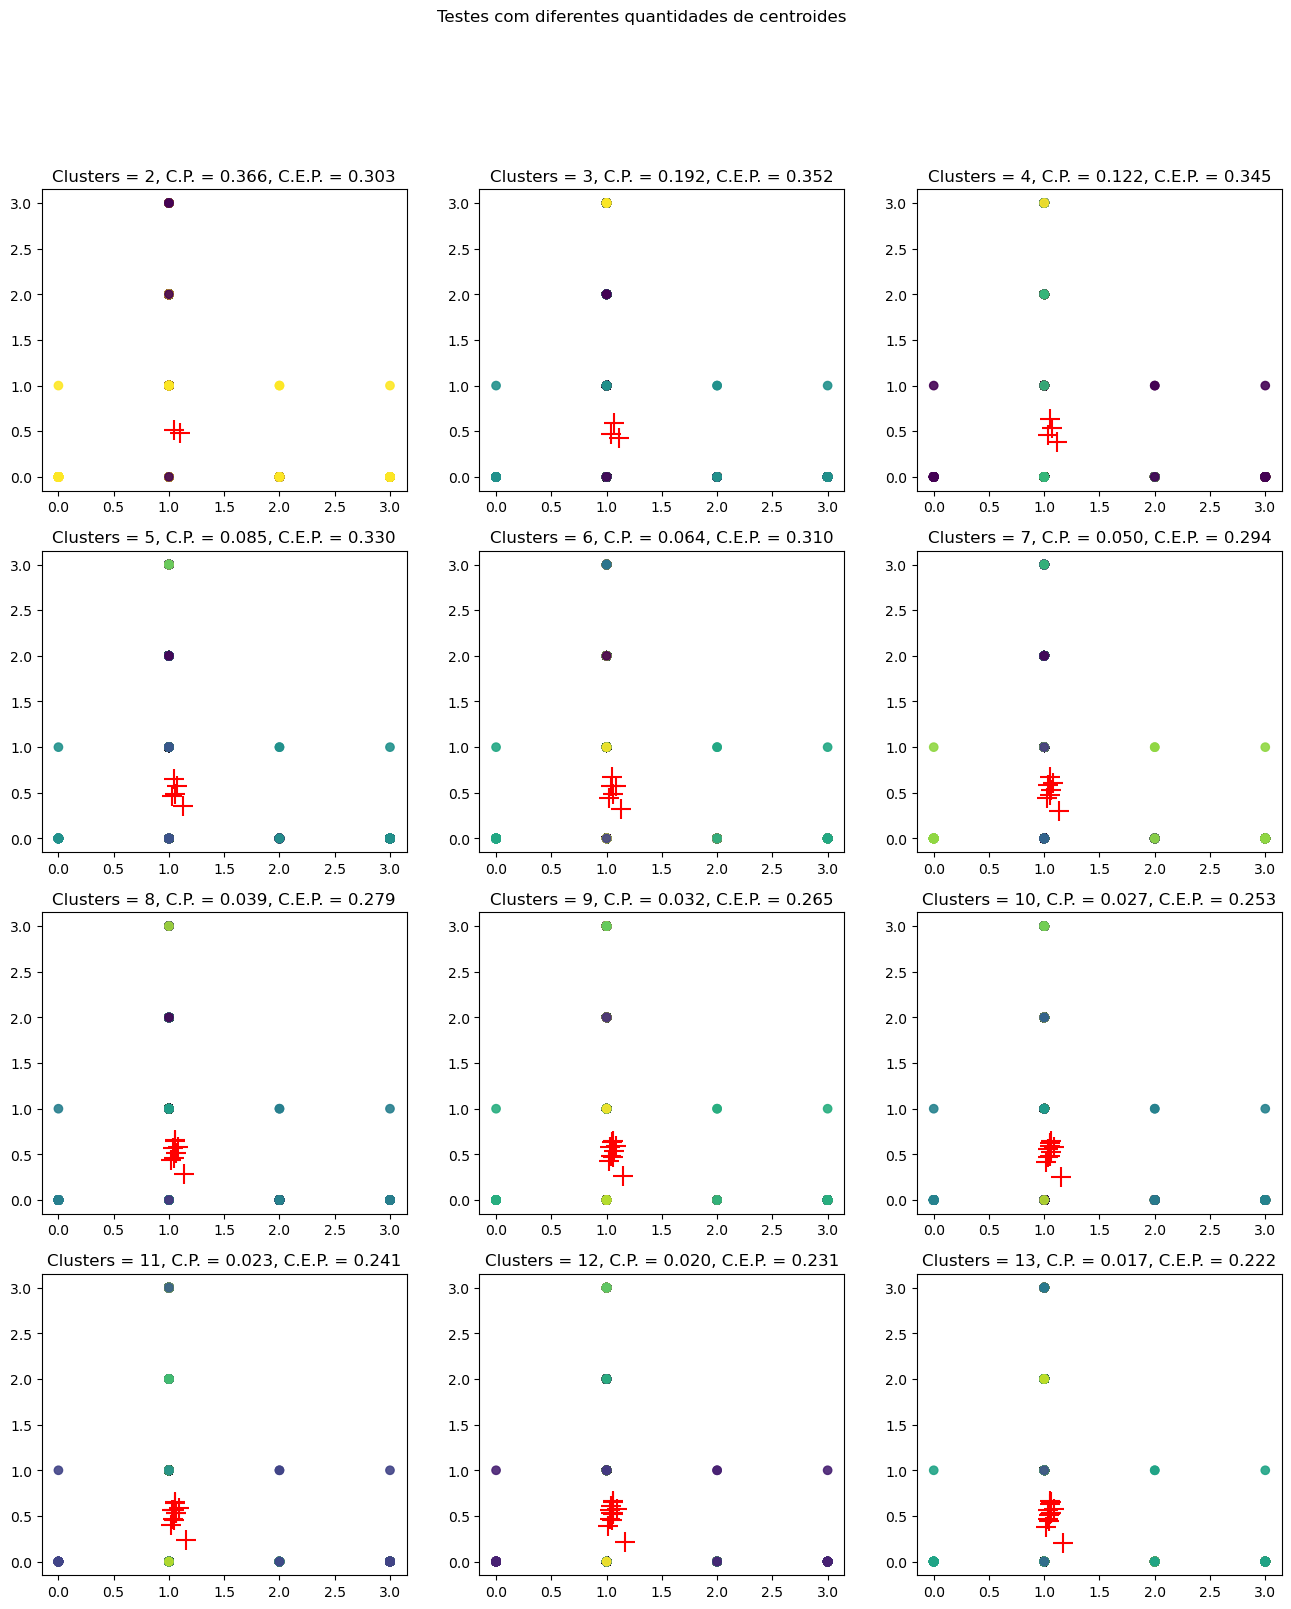

In [9]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(df_dieta_grupos.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_dieta_grupos.values)
    
    eixo.scatter(df_dieta_grupos.values[:,0], df_dieta_grupos.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.336 e C.E.P. = 0.303.

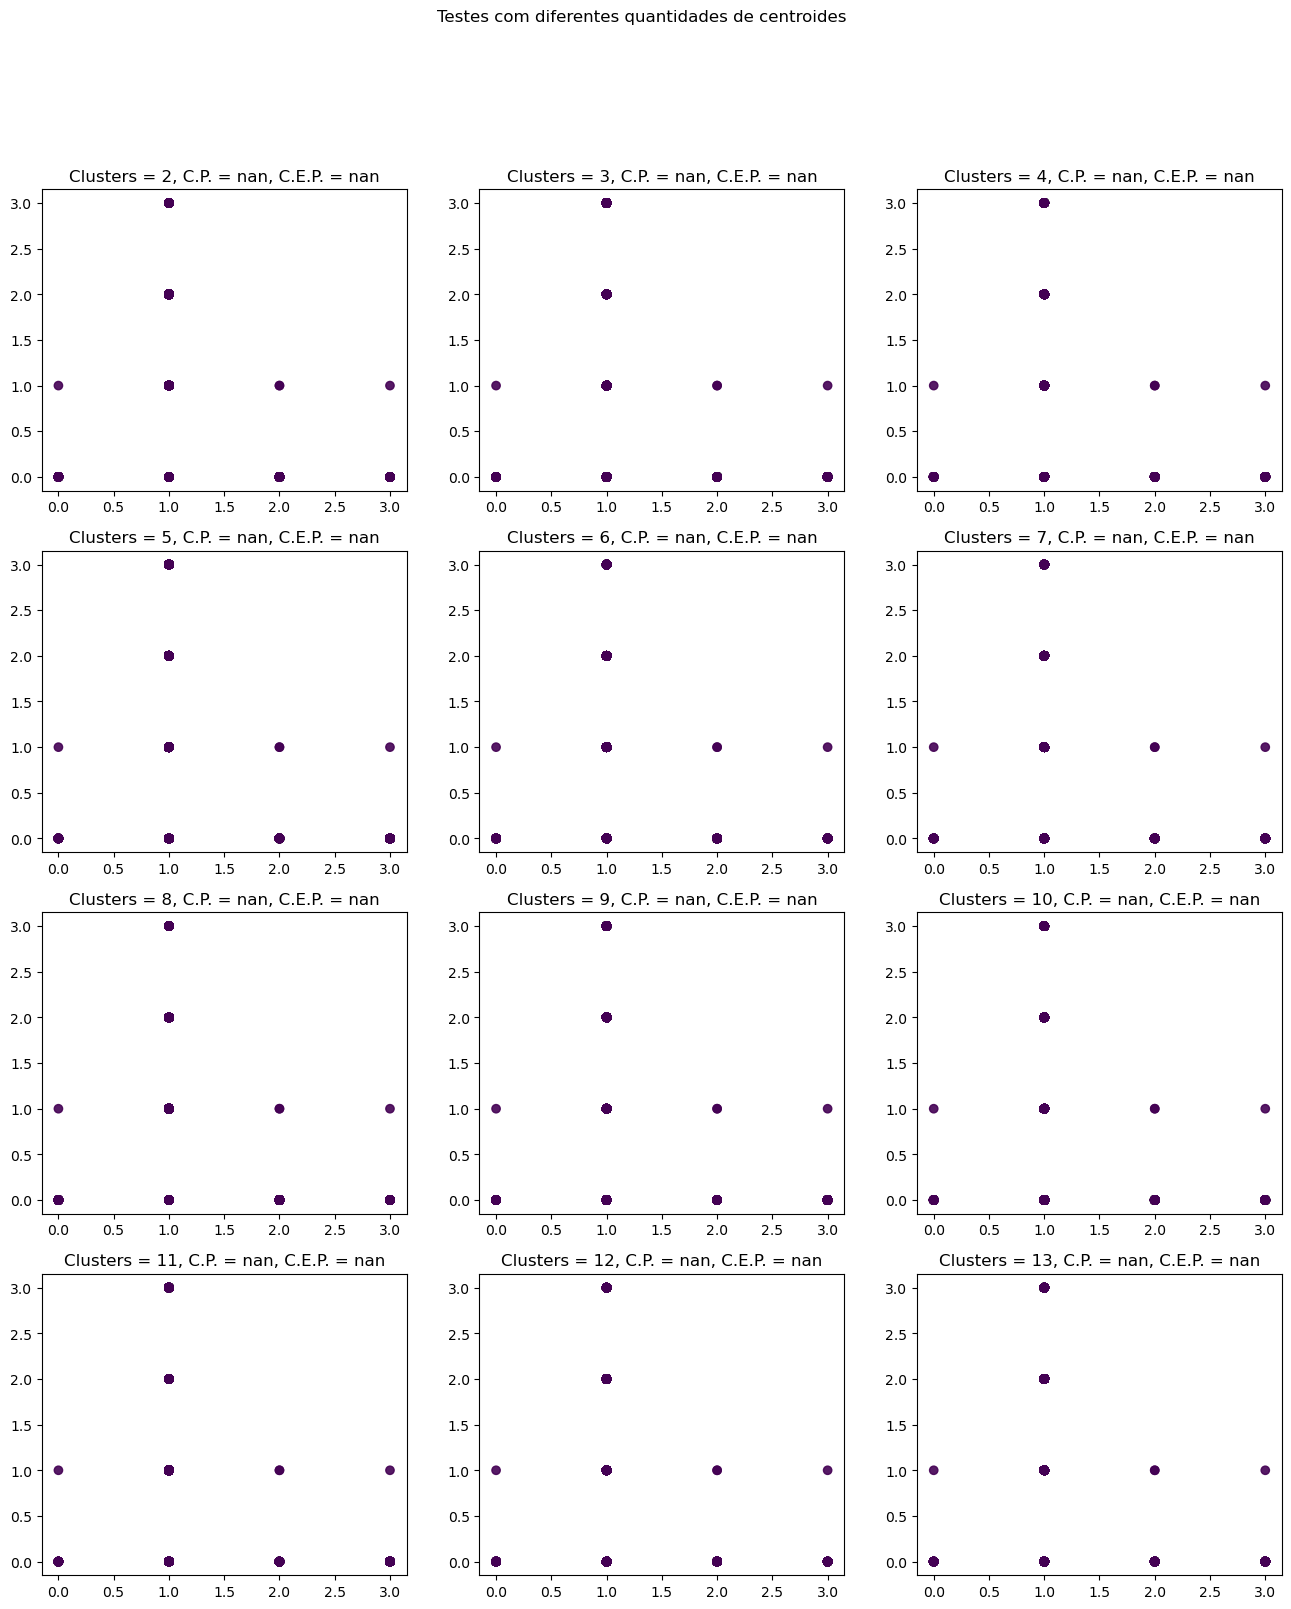

In [13]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(df_dieta_grupos.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_dieta_grupos.values)
    
    eixo.scatter(df_dieta_grupos.values[:,0], df_dieta_grupos.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima ocorre erro de divisão logo no começo das iterações. Isso não permite que nenhum gráfico seja impresso.

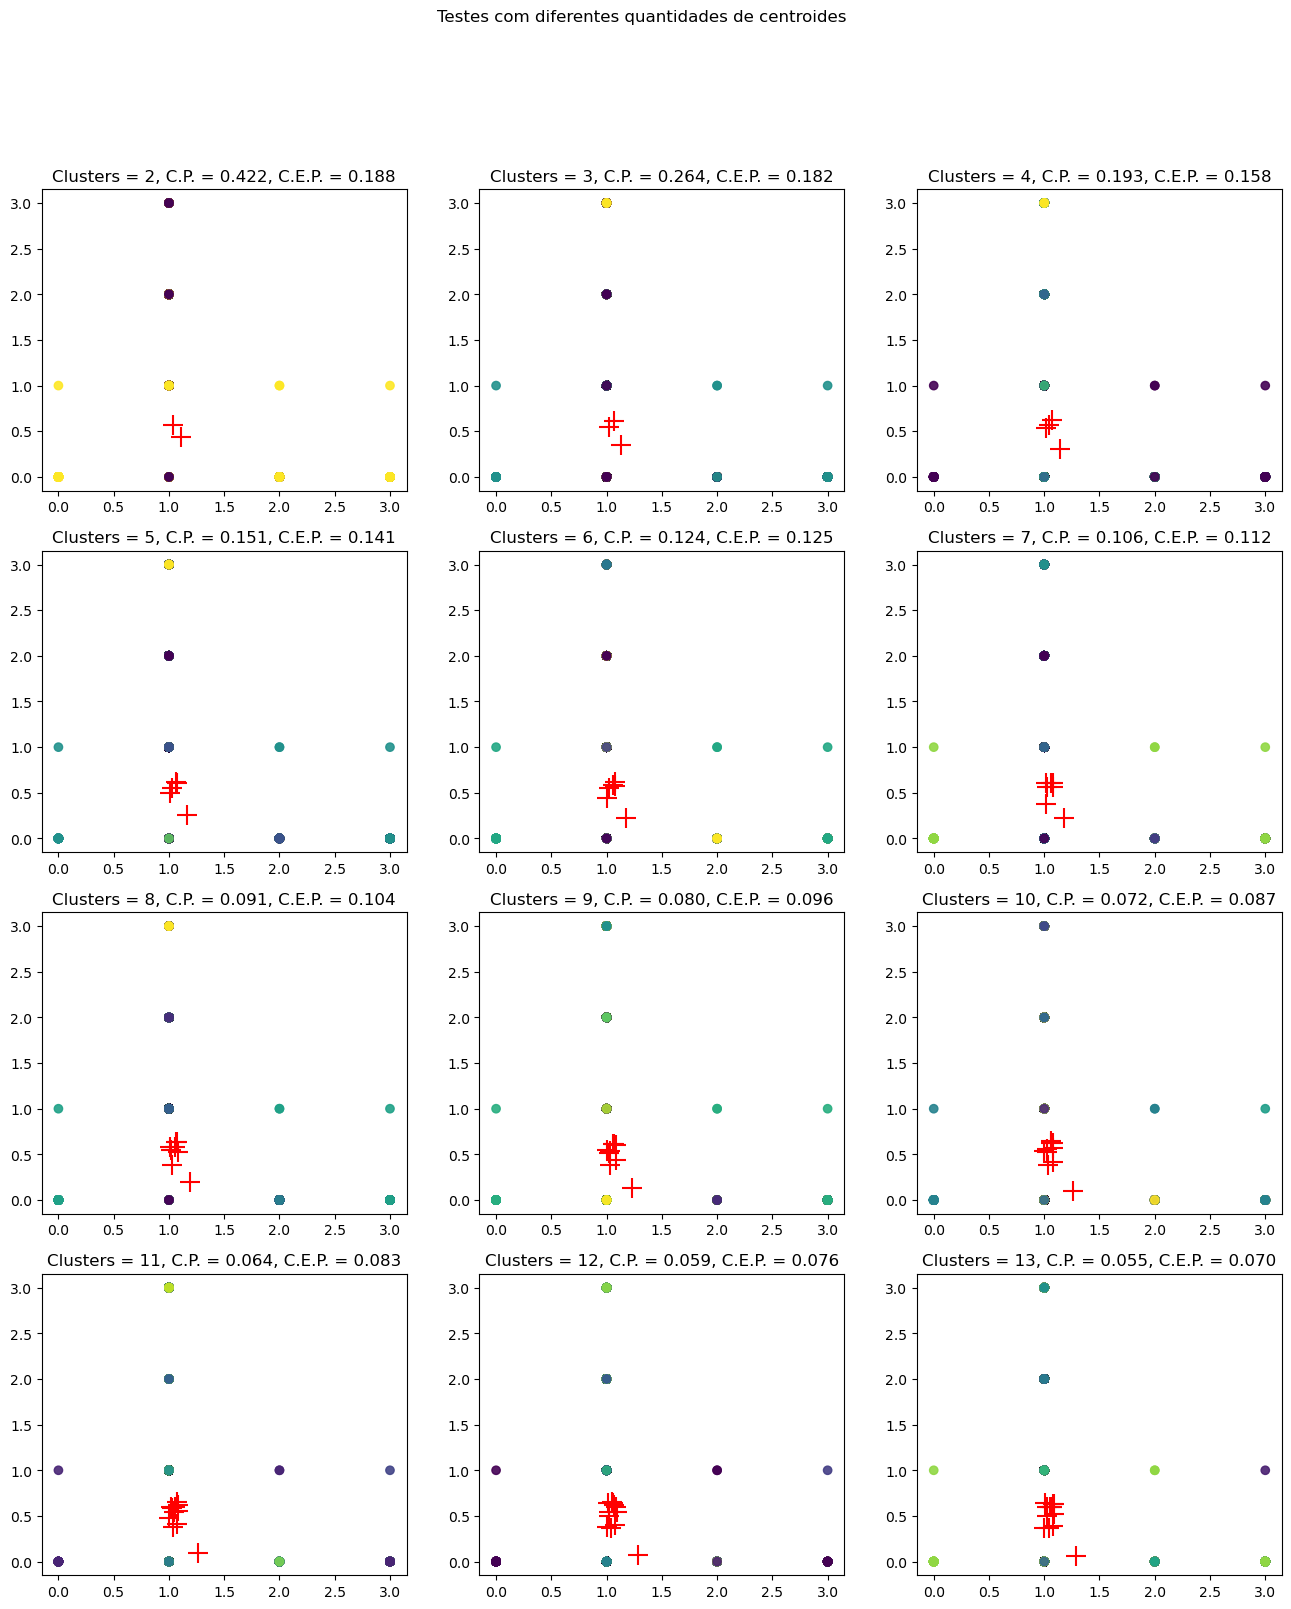

In [17]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_dieta_grupos.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_dieta_grupos.values)
    
    eixo.scatter(df_dieta_grupos.values[:,0], df_dieta_grupos.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.422 e C.E.P. = 0.188.

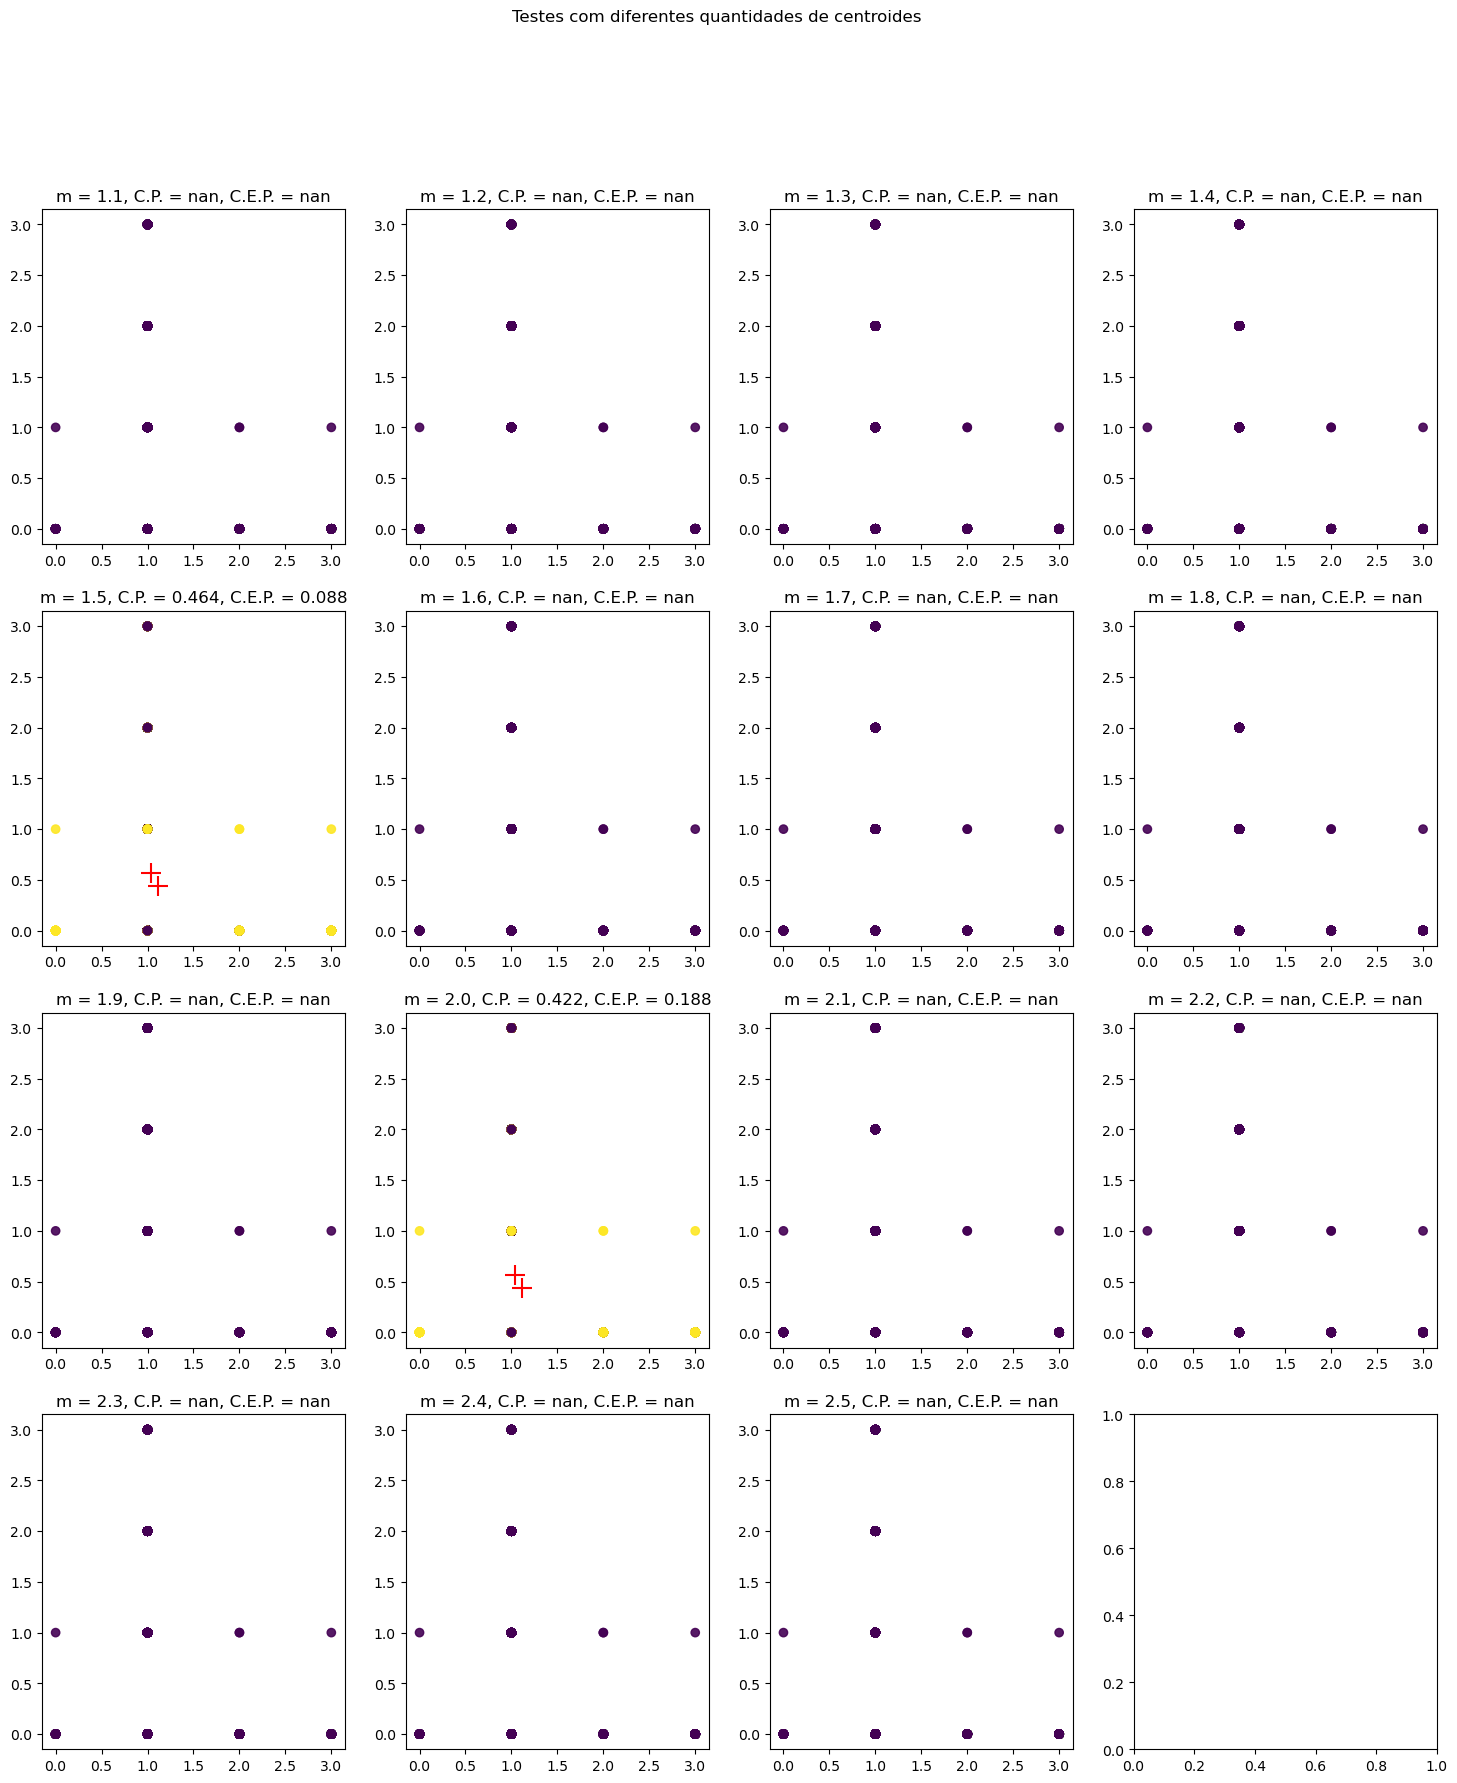

In [18]:
lista_parametros_fuzzy = [round(i, 1) for i in np.arange(1.1, 2.6, 0.1)]
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = parametro_fuzzy,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_dieta_grupos.values)
    modelos.append(fcmeans)
    
qtd_parametro_fuzzy = len(lista_parametros_fuzzy)
linhas = int(np.ceil(np.sqrt(qtd_parametro_fuzzy)))
colunas = int(np.ceil(qtd_parametro_fuzzy / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (18, 20))

for parametro_fuzzy, modelo, eixo in zip(lista_parametros_fuzzy, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_dieta_grupos.values)
    
    eixo.scatter(df_dieta_grupos.values[:,0], df_dieta_grupos.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"m = {parametro_fuzzy}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

Como podemos vez acima, o melhor parâmetro fuzzy é `m = 1.5`, com com C.P. = 0.464 e C.E.P. = 0.088.

### DATASET Perfil Hepatico

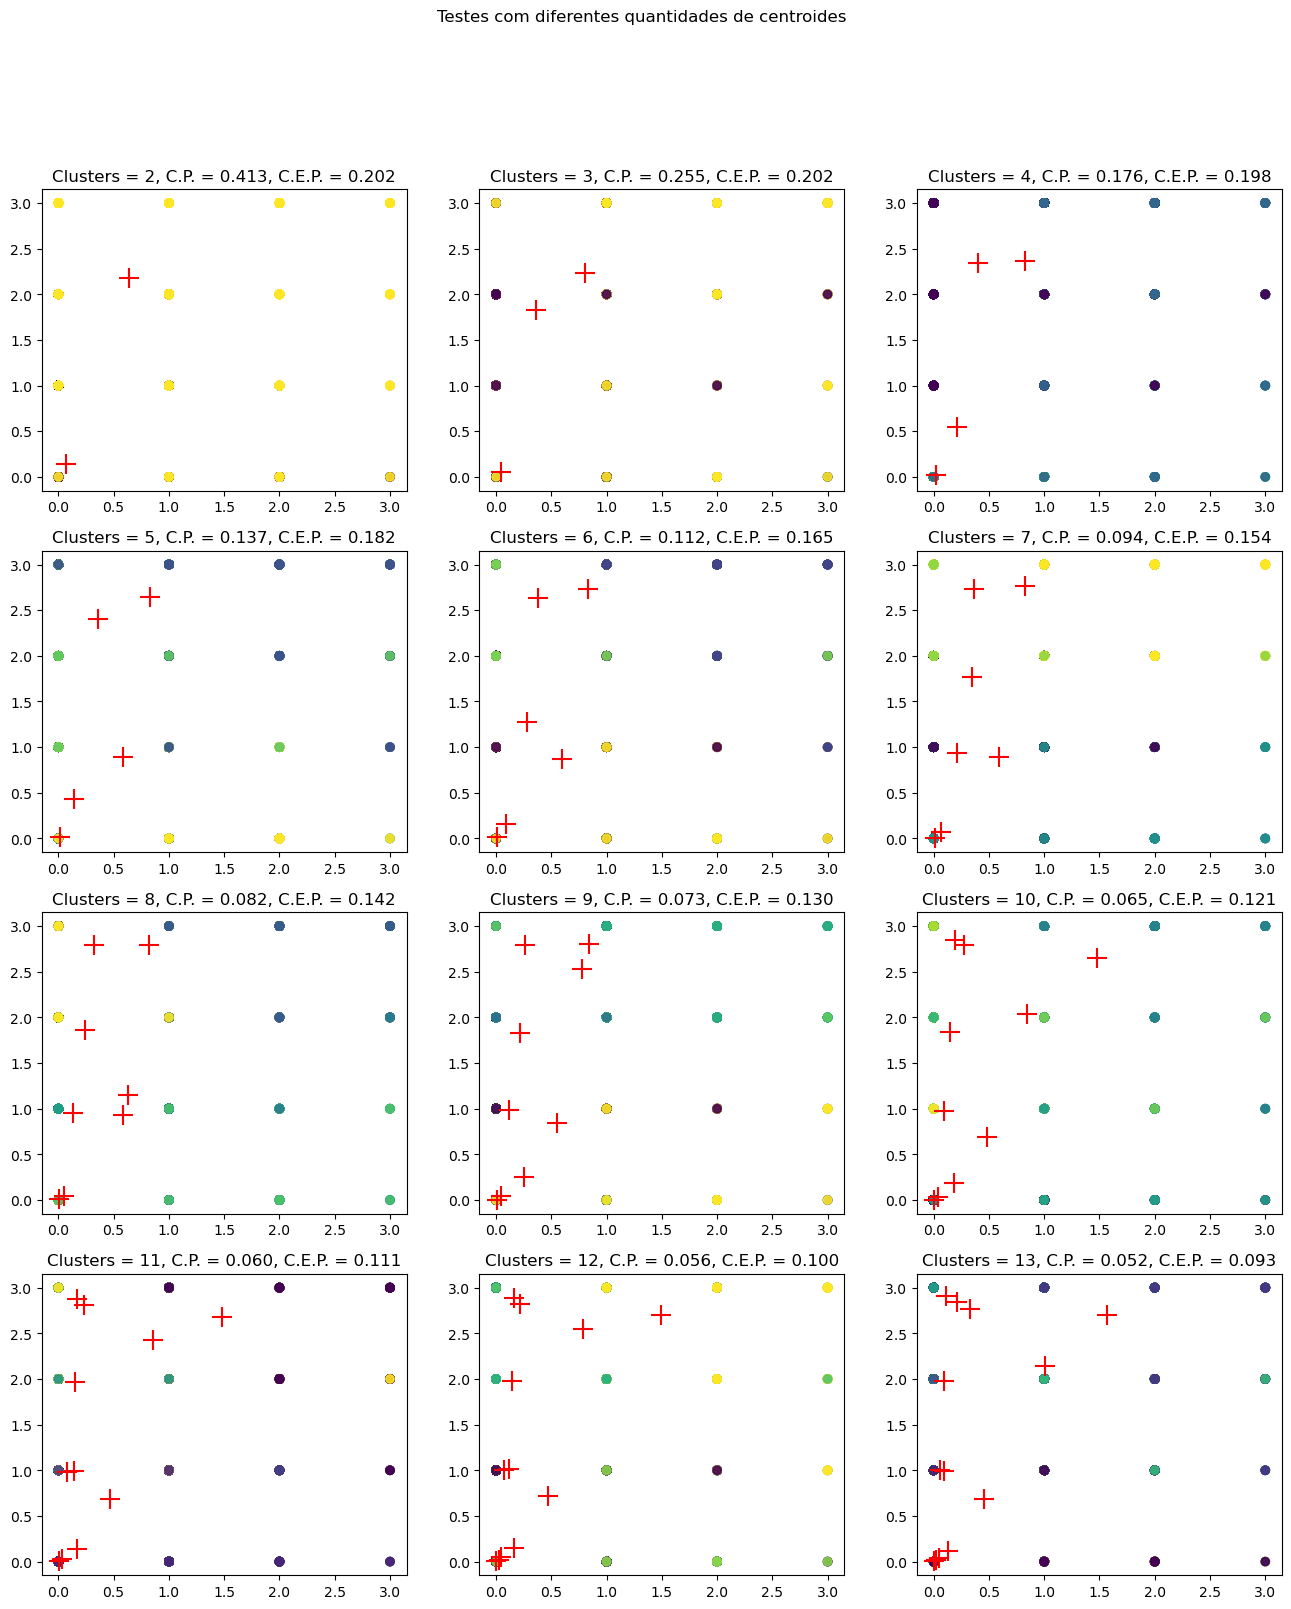

In [19]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(df_perfil_hepatico.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_perfil_hepatico.values)
    
    eixo.scatter(df_perfil_hepatico.values[:,0], df_perfil_hepatico.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.413 e C.E.P. = 0.202.

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:172: RuntimeWarning: invalid value encountered in divide
  return np.dot(A, B.T) / (p1*p2)


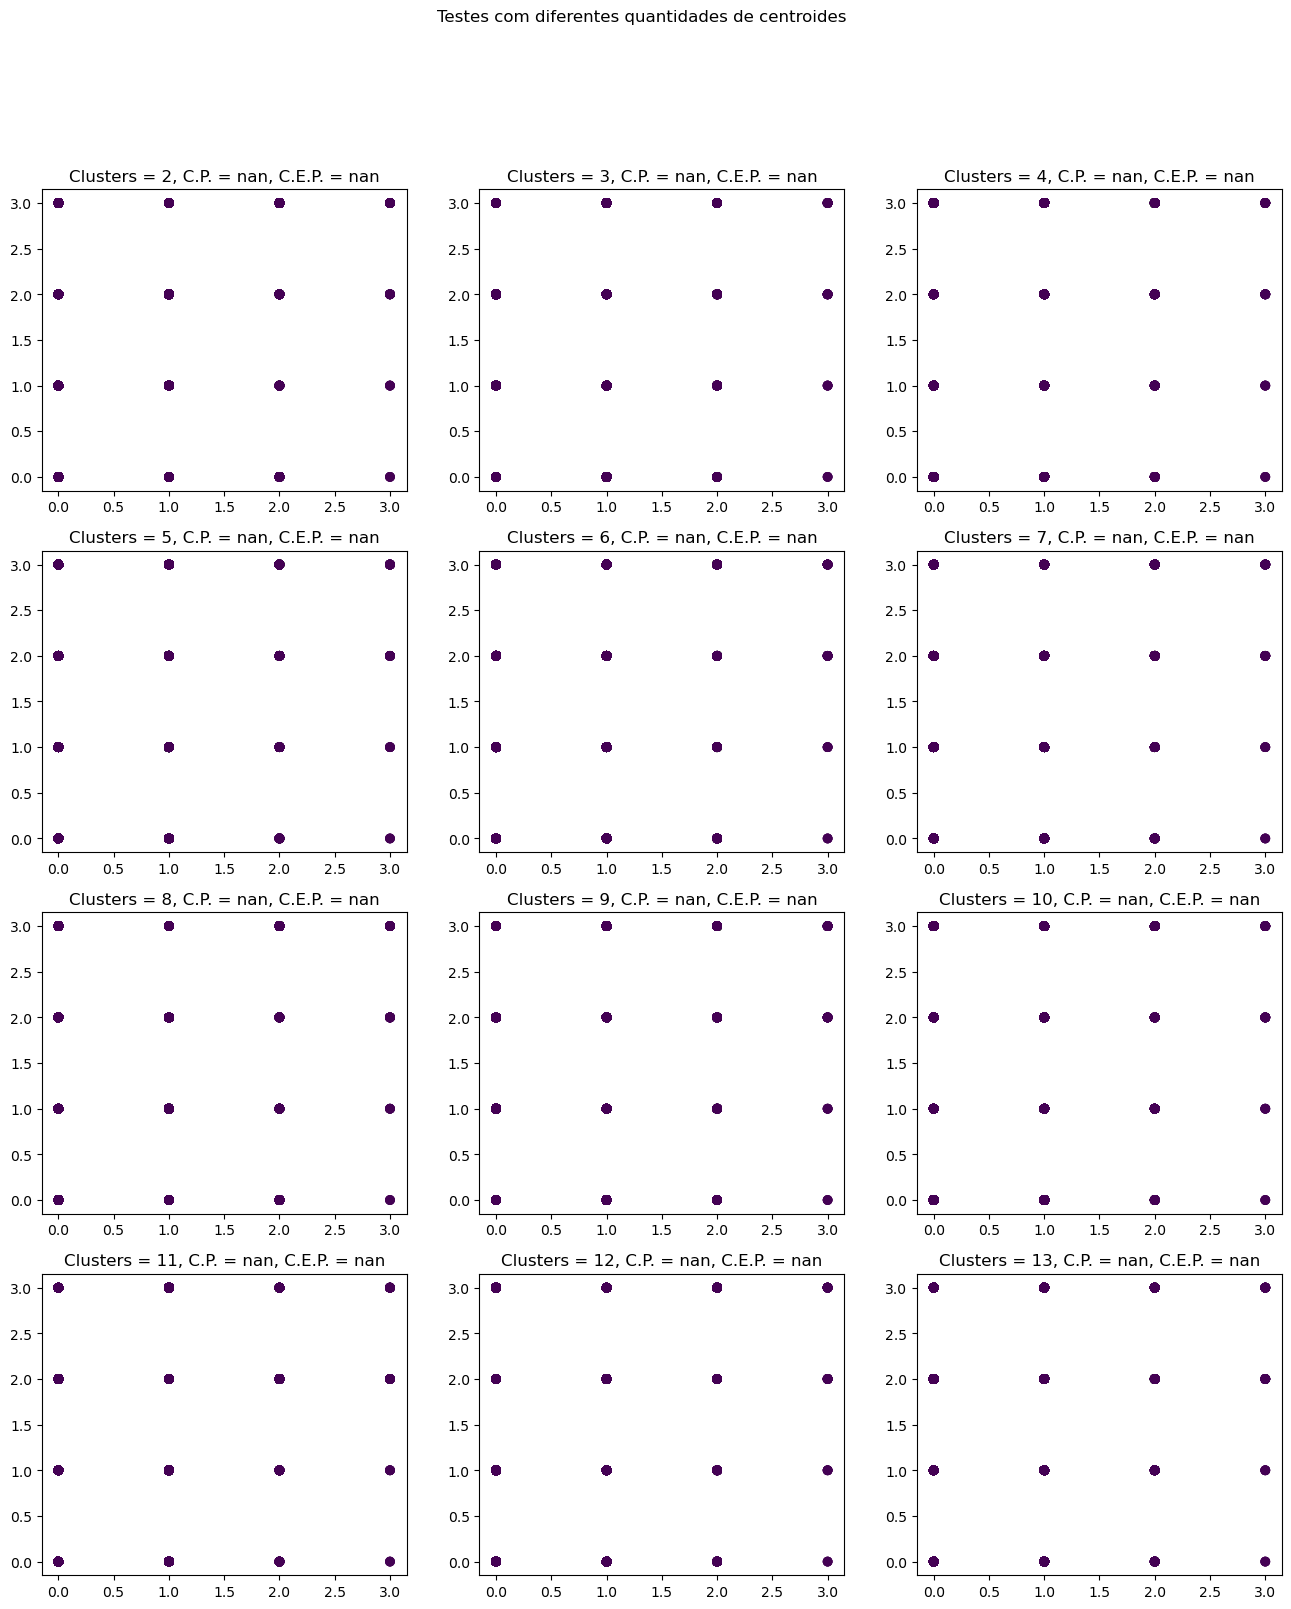

In [20]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(df_perfil_hepatico.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_perfil_hepatico.values)
    
    eixo.scatter(df_perfil_hepatico.values[:,0], df_perfil_hepatico.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima ocorre erro de divisão logo no começo das iterações. Isso não permite que nenhum gráfico seja impresso.

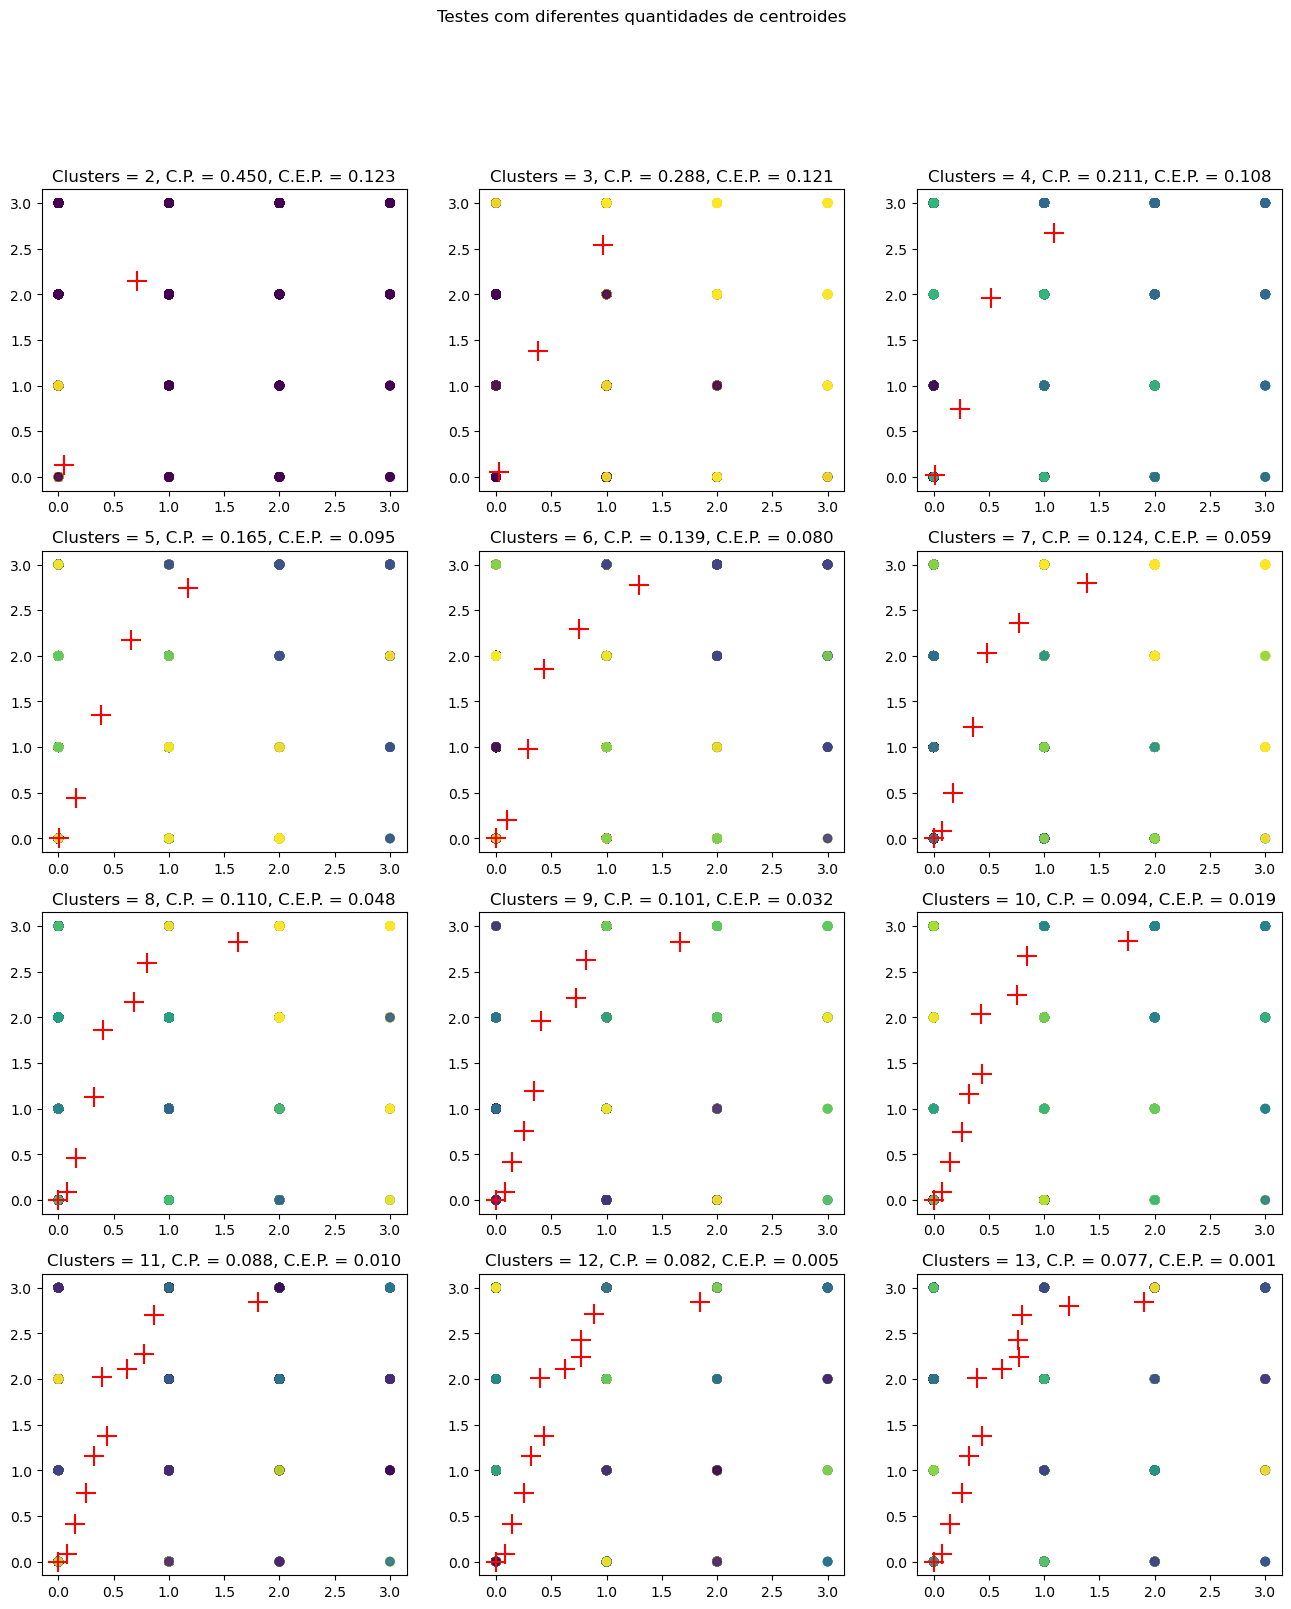

In [24]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_perfil_hepatico.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_perfil_hepatico.values)
    
    eixo.scatter(df_perfil_hepatico.values[:,0], df_perfil_hepatico.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.450 e C.E.P. = 0.123.

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:94: RuntimeWarning: invalid value encountered in power
  temp = FCM._dist(


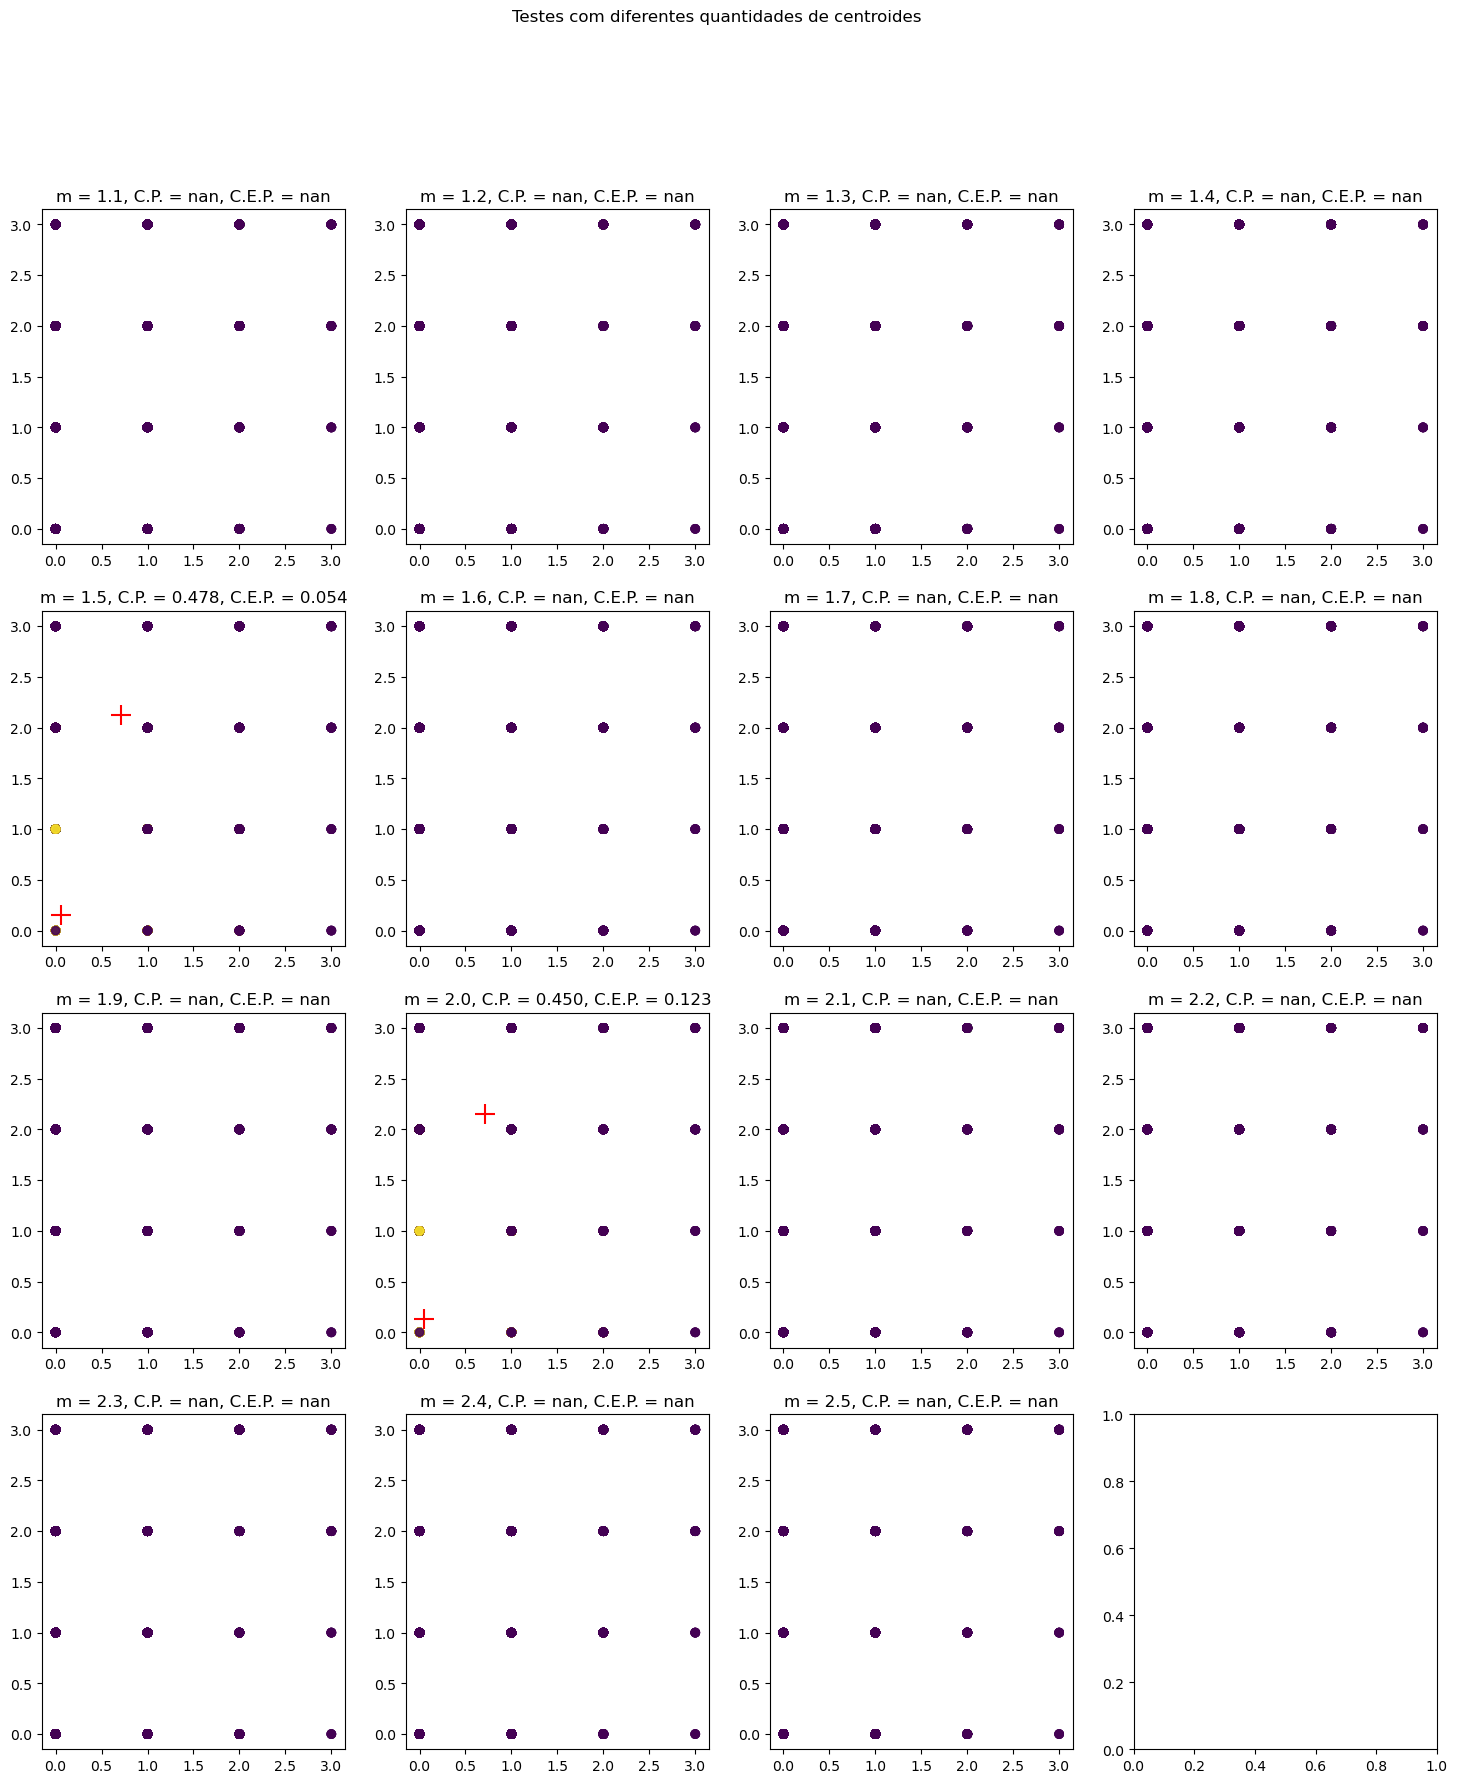

In [22]:
lista_parametros_fuzzy = [round(i, 1) for i in np.arange(1.1, 2.6, 0.1)]
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = parametro_fuzzy,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_perfil_hepatico.values)
    modelos.append(fcmeans)
    
qtd_parametro_fuzzy = len(lista_parametros_fuzzy)
linhas = int(np.ceil(np.sqrt(qtd_parametro_fuzzy)))
colunas = int(np.ceil(qtd_parametro_fuzzy / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (18, 20))

for parametro_fuzzy, modelo, eixo in zip(lista_parametros_fuzzy, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_perfil_hepatico.values)
    
    eixo.scatter(df_perfil_hepatico.values[:,0], df_perfil_hepatico.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"m = {parametro_fuzzy}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

Como podemos vez acima, o melhor parâmetro fuzzy é `m = 1.5`, com com C.P. = 0.478 e C.E.P. = 0.054.

### DATASET ureia

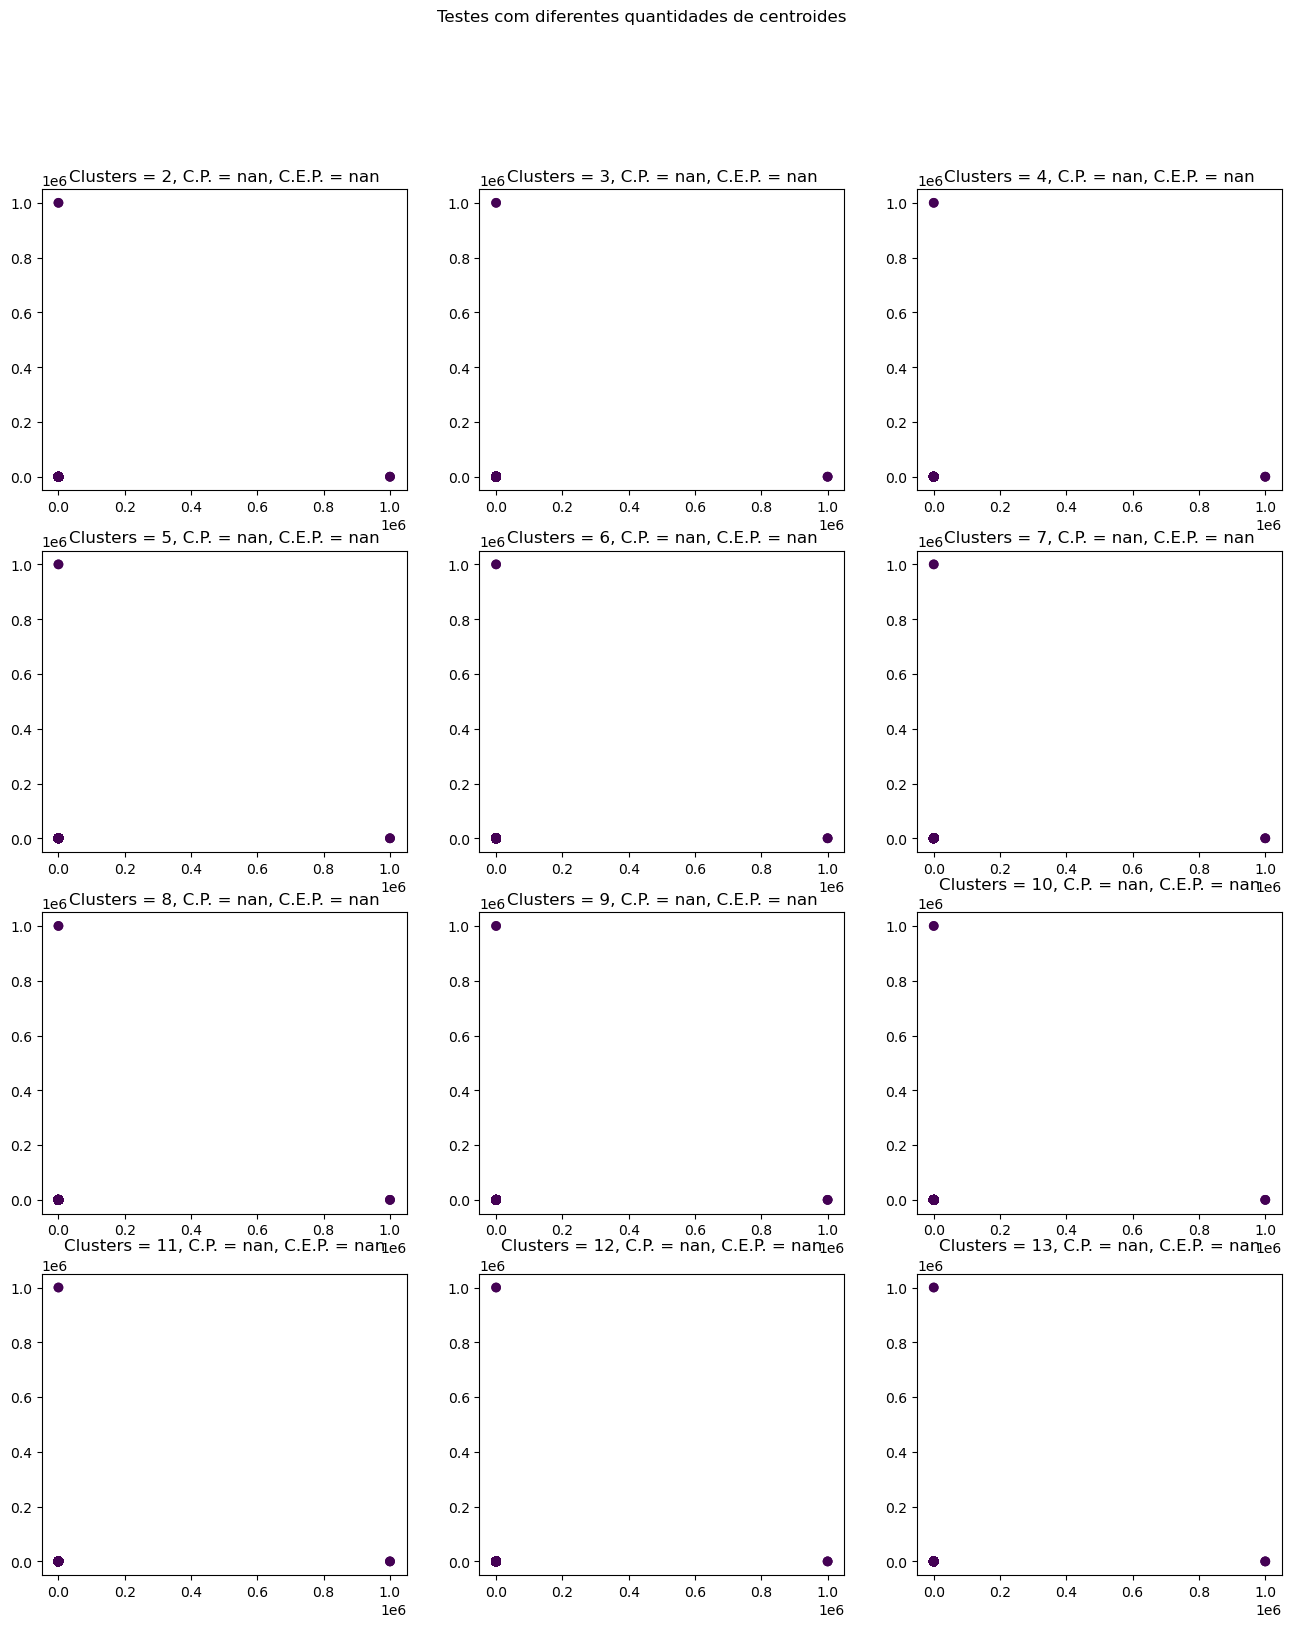

In [5]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(df_ureia.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_ureia.values)
    
    eixo.scatter(df_ureia.values[:,0], df_ureia.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

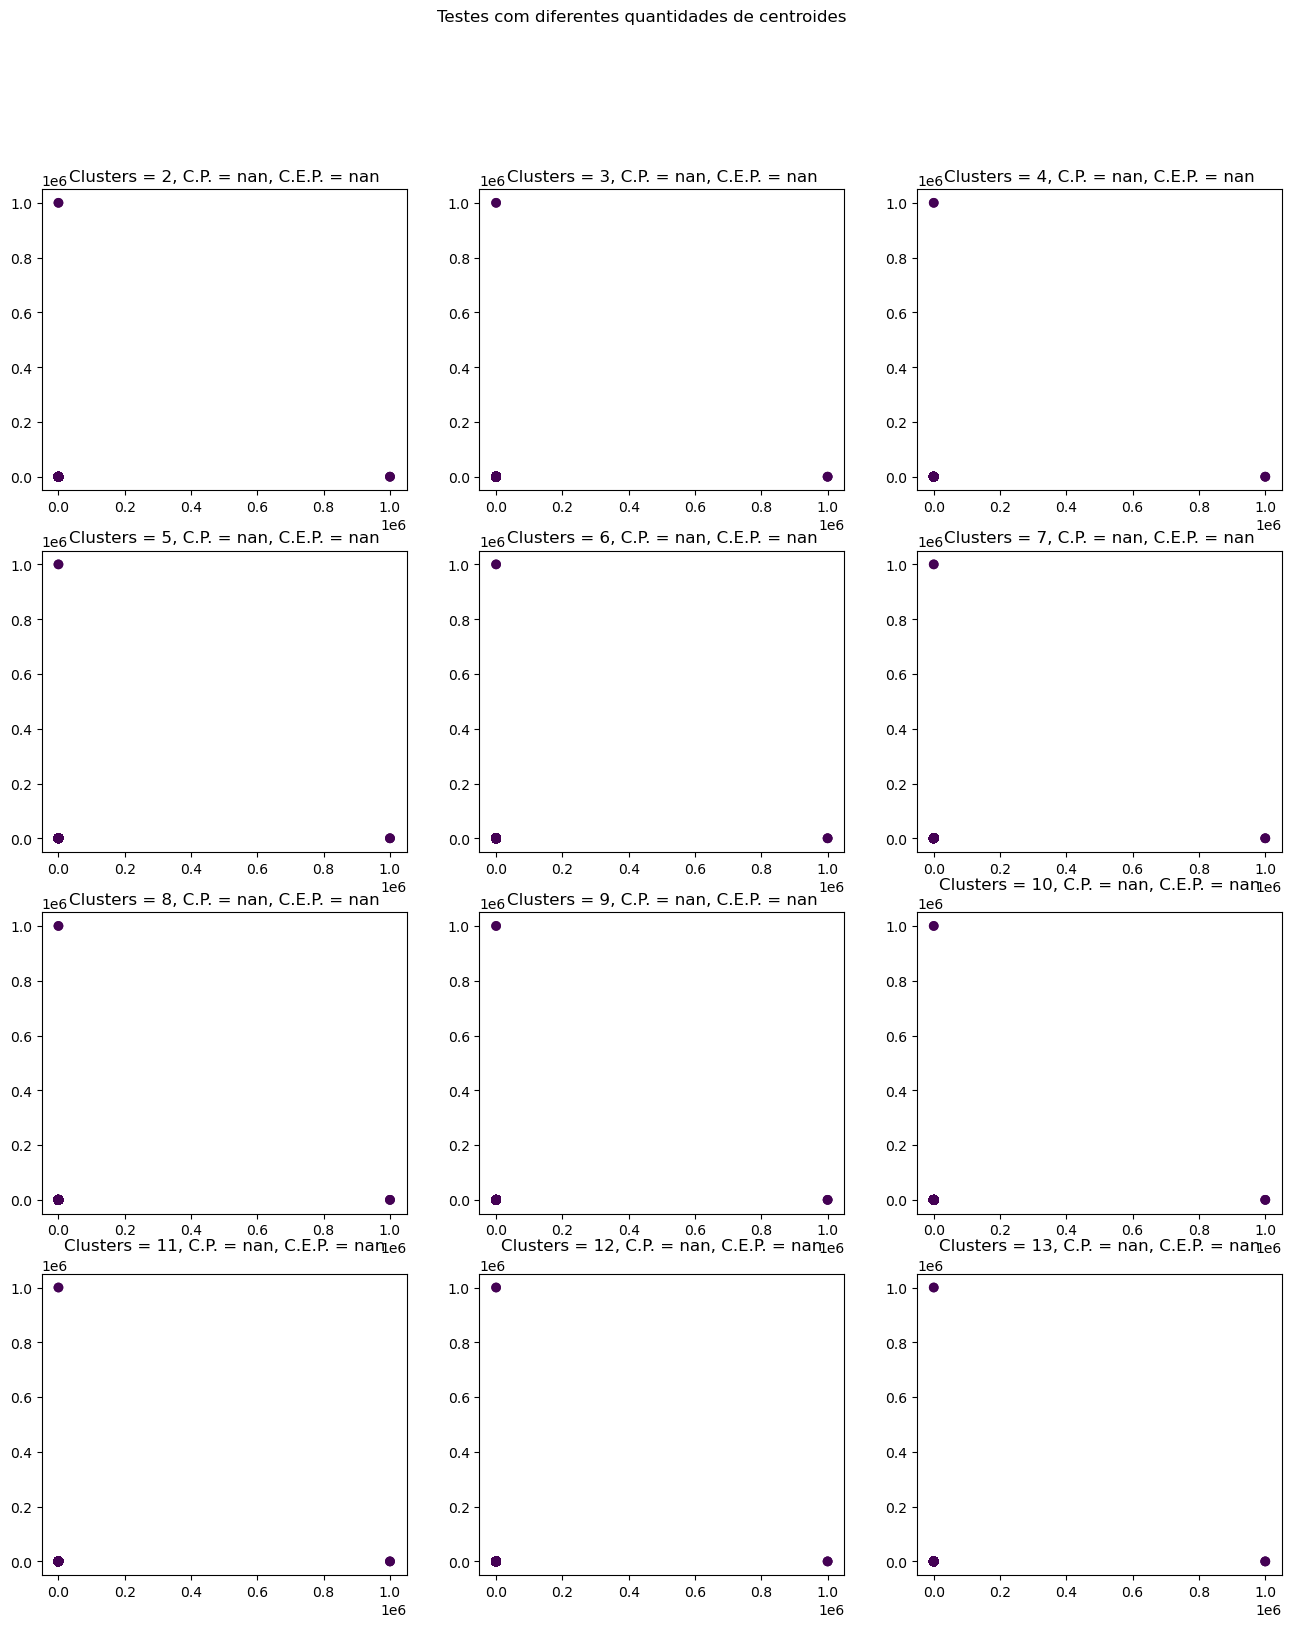

In [6]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(df_ureia.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_ureia.values)
    
    eixo.scatter(df_ureia.values[:,0], df_ureia.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

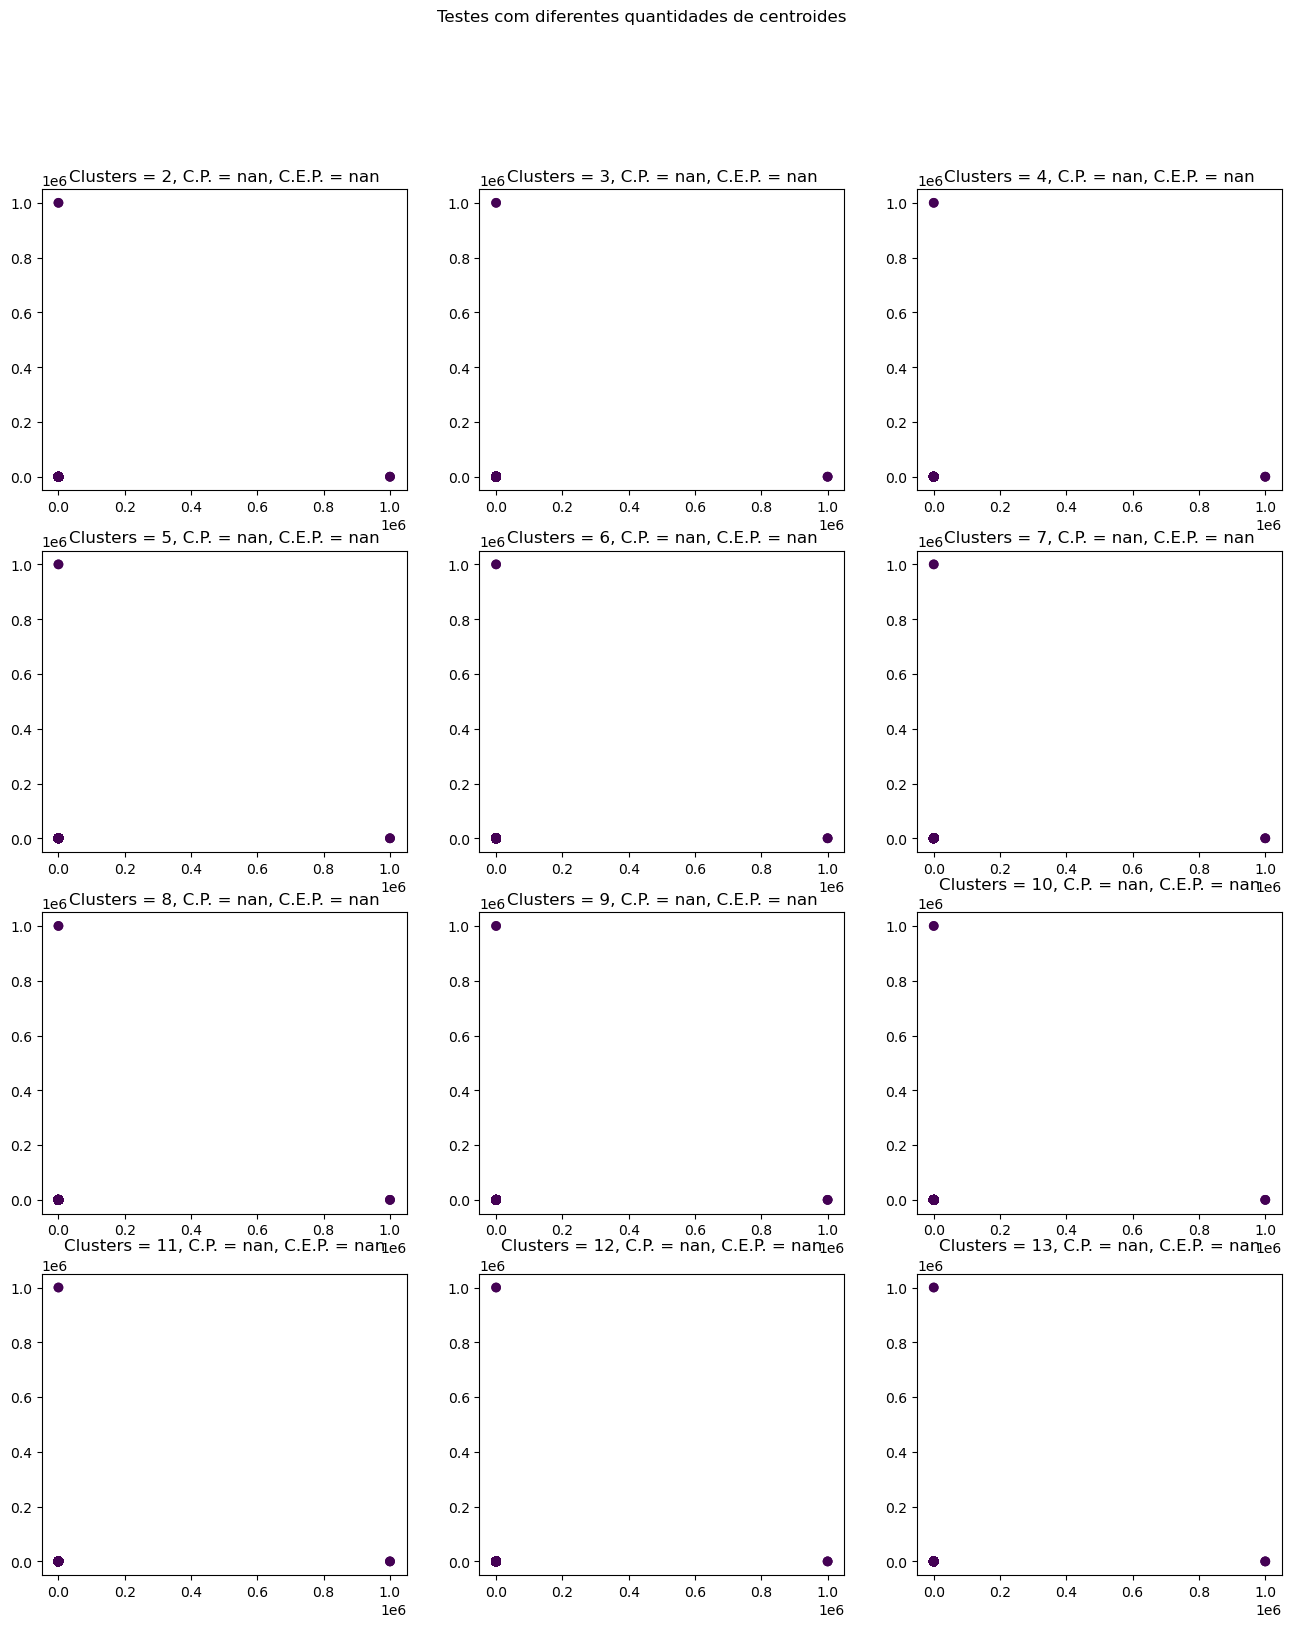

In [7]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_ureia.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_ureia.values)
    
    eixo.scatter(df_ureia.values[:,0], df_ureia.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

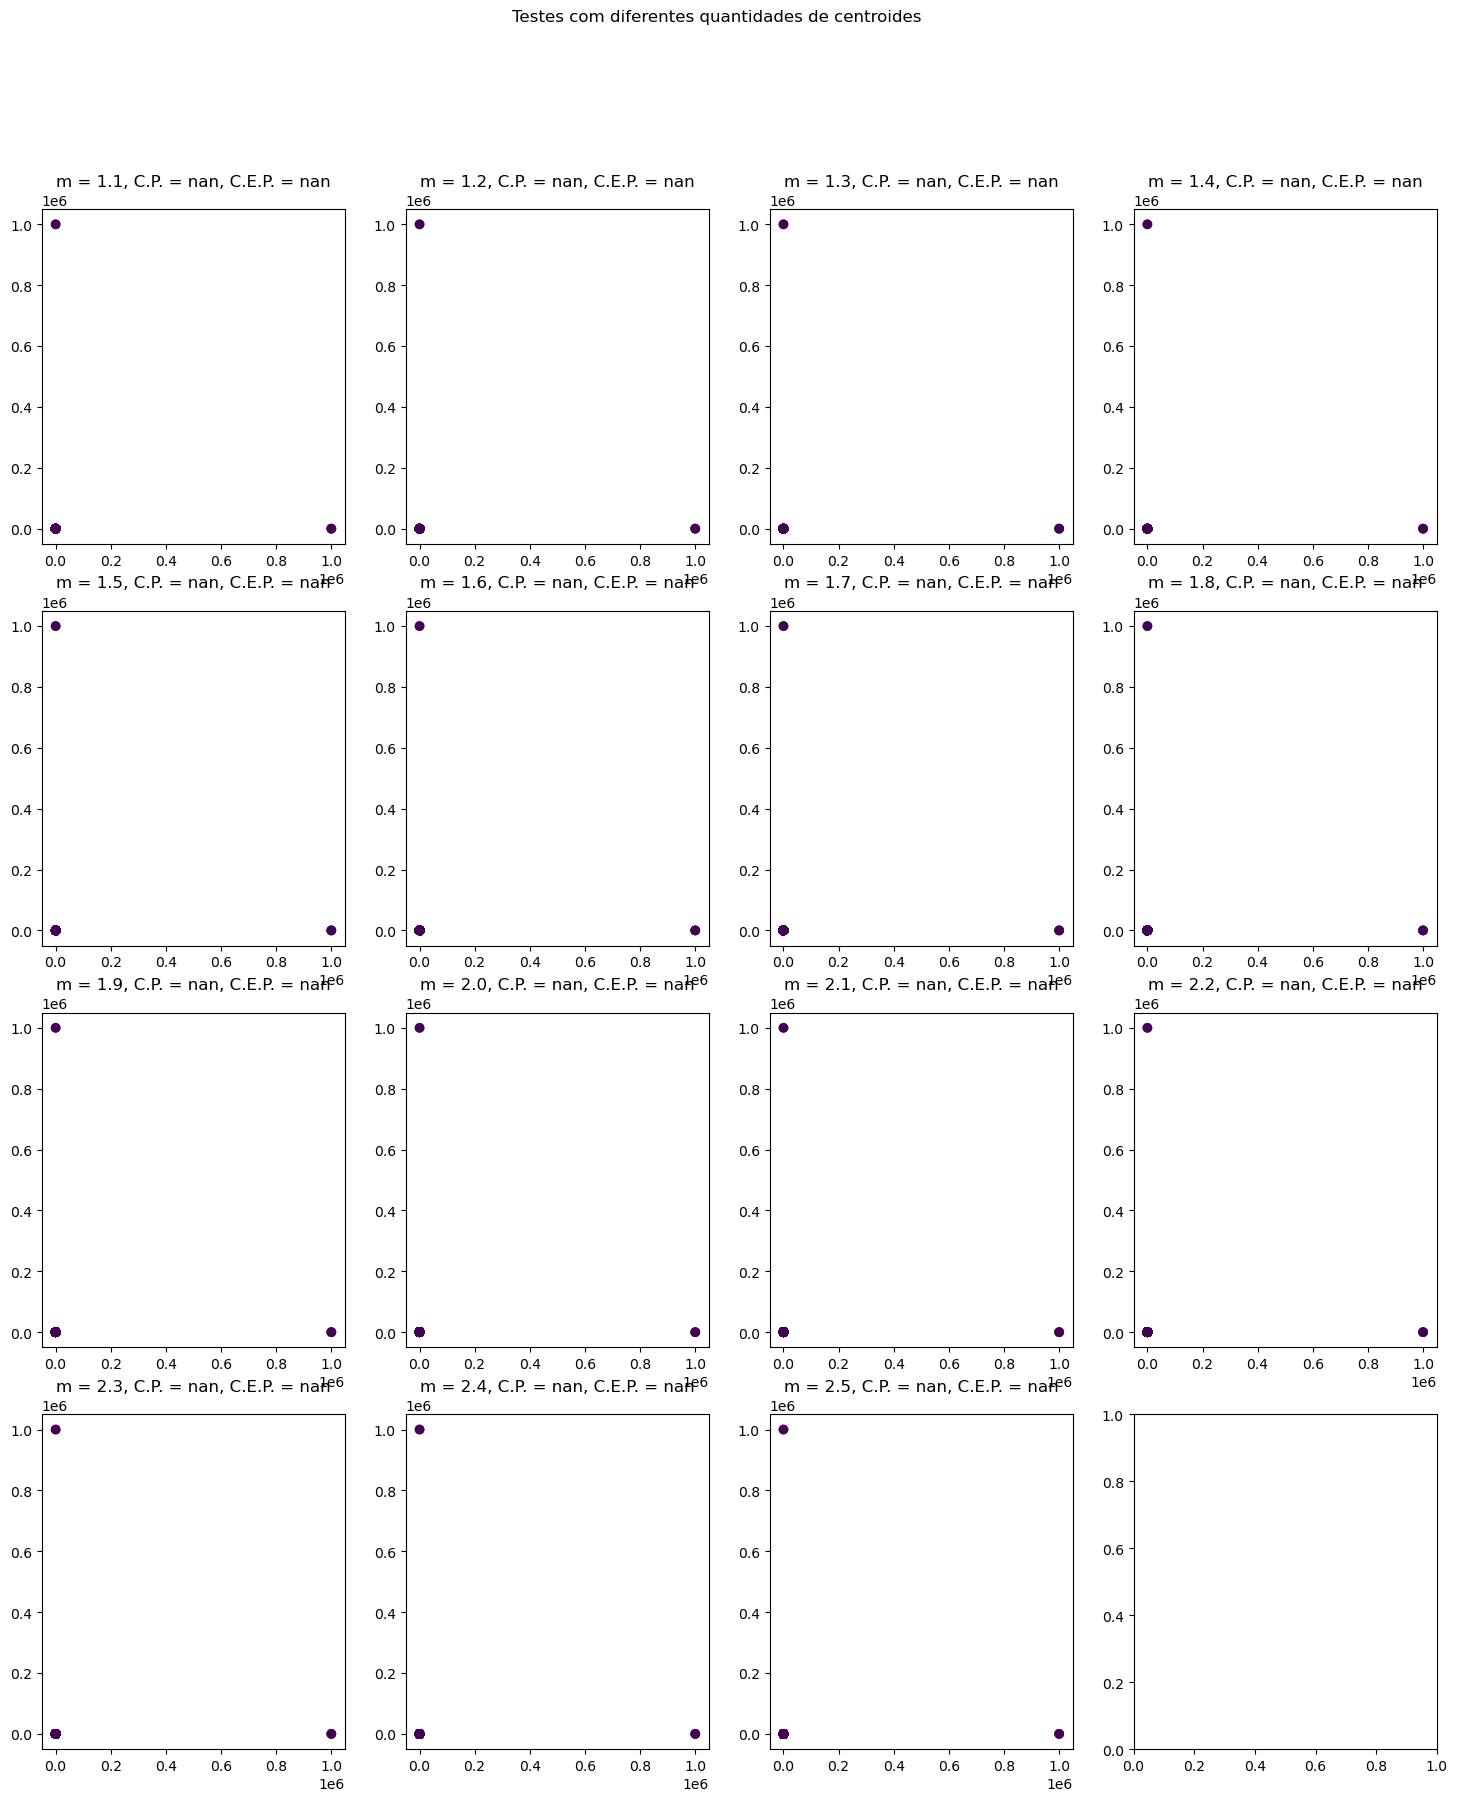

In [8]:
lista_parametros_fuzzy = [round(i, 1) for i in np.arange(1.1, 2.6, 0.1)]
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = parametro_fuzzy,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_ureia.values)
    modelos.append(fcmeans)
    
qtd_parametro_fuzzy = len(lista_parametros_fuzzy)
linhas = int(np.ceil(np.sqrt(qtd_parametro_fuzzy)))
colunas = int(np.ceil(qtd_parametro_fuzzy / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (18, 20))

for parametro_fuzzy, modelo, eixo in zip(lista_parametros_fuzzy, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_ureia.values)
    
    eixo.scatter(df_ureia.values[:,0], df_ureia.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"m = {parametro_fuzzy}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

### Imprimindo clusteres

In [9]:
fcmeans_ureia = FCM(n_clusters = 2,
                    random_state = 42,
                    max_iter = 500,
                    distance = "minkowski",
                    m = 1.5,
                    distance_params = {"p": 1.0})
fcmeans_ureia.fit(df_ureia.values)
y_ureia = fcmeans_ureia.predict(df_ureia.values)
centros_ureia = fcmeans_ureia.centers

In [10]:
np.unique(centros_ureia)

array([nan])

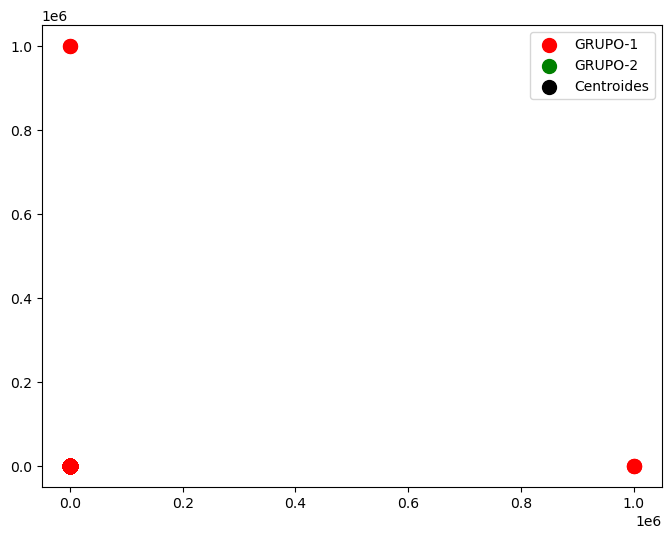

In [11]:
plt.figure(figsize = (8, 6))

### OS PONTOS GERAIS
plt.scatter(df_ureia.values[y_ureia == 0, 0], df_ureia.values[y_ureia == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(df_ureia.values[y_ureia == 1, 0], df_ureia.values[y_ureia == 1, 1], s = 100, c = "green", label = "GRUPO-2")

### OS CENTROIDES
plt.scatter(centros_ureia[:, 0], centros_ureia[:, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

### Testando novamente com Dataset despivoteado e multi-indexado

#### Despivoteado

In [14]:
colunas = df_ureia.columns.to_list()
colunas.pop(0)

df_ureia.reset_index(inplace = True)
df_ureia_despivoteado = despivotear_dataset(df_ureia,
                                            ["subject_id"],
                                            colunas,
                                            "UreiaMaxDay",
                                            "day")
df_ureia_despivoteado["day"] = renomear_series(df_ureia_despivoteado["day"], "ureia_dia_")
df_ureia_despivoteado.head(15)

,subject_id,day,UreiaMaxDay
0,10001884,2,NaN
1,10004422,2,13.0
2,10004733,2,41.0
3,10005606,2,6.0
4,10010867,2,5.0
5,10019777,2,22.0
6,10020944,2,28.0
7,10023486,2,48.0
8,10032381,2,9.0
9,10035747,2,16.0


#### Multi-indexando

In [15]:
df_ureia_despivoteado = multi_indexar_dataset(df_ureia_despivoteado, indices = ["subject_id", "day"])
df_ureia_despivoteado.dropna(axis = 0, inplace = True)
df_ureia_despivoteado.head(15)

UreiaMaxDay
subject_id day             
10001884   3           38.0
           4           31.0
           5           26.0
           6           22.0
           7           14.0
10004422   2           13.0
           3           17.0
           4           16.0
           5           20.0
           6           24.0
10004733   2           41.0
           3           39.0
           4           37.0
           5           28.0
           6           26.0

#### Rodando o algoritmo F-c-Means

In [16]:
fcmeans_ureia = FCM(n_clusters = 3,
                    random_state = 42,
                    max_iter = 500,
                    distance = "minkowski",
                    m = 1.5,
                    distance_params = {"p": 1.0})
fcmeans_ureia.fit(df_ureia_despivoteado.values)
y_ureia = fcmeans_ureia.predict(df_ureia_despivoteado.values)
centros_ureia = fcmeans_ureia.centers

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:102: RuntimeWarning: divide by zero encountered in divide
  lambda data, col: (data[:, col] / data.T).sum(0)
/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:102: RuntimeWarning: invalid value encountered in divide
  lambda data, col: (data[:, col] / data.T).sum(0)


In [17]:
print("Centros:", centros_ureia)

Centros: [[nan]
 [nan]
 [nan]]


##### Imprimindo resultado do teste

In [18]:
plt.figure(figsize = (8, 6))

plt.scatter(df_ureia_despivoteado.values[y_ureia == 0, 0], df_ureia_despivoteado.values[y_ureia == 0, 1], s = 100, c = "red", label = "GRUPO_1")
plt.scatter(df_ureia_despivoteado.values[y_ureia == 1, 0], df_ureia_despivoteado.values[y_ureia == 1, 1], s = 100, c = "green", label = "GRUPO_2")
plt.scatter(df_ureia_despivoteado.values[y_ureia == 2, 0], df_ureia_despivoteado.values[y_ureia == 2, 1], s = 100, c = "blue", label = "GRUPO_3")

plt.scatter(centros_ureia[:, 0], centros_ureia[:, 0], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 800x600 with 0 Axes>

### Testando novamente com Dataset pivoteado, mas dropando os valores nulos

#### Dropando os valores nulos

In [19]:
df_ureia_sem_nulos = df_ureia.dropna(axis = 0, inplace = False)
df_ureia_sem_nulos.head(10)

,subject_id,ureia_dia_1,ureia_dia_2,ureia_dia_3,ureia_dia_4,ureia_dia_5,ureia_dia_6,ureia_dia_7
2,10004733,44.0,41.0,39.0,37.0,28.0,26.0,28.0
4,10010867,8.0,5.0,5.0,5.0,6.0,7.0,9.0
5,10019777,17.0,22.0,16.0,19.0,18.0,17.0,16.0
6,10020944,34.0,28.0,26.0,22.0,21.0,20.0,19.0
7,10023486,42.0,48.0,54.0,63.0,68.0,69.0,70.0
8,10032381,9.0,9.0,9.0,14.0,21.0,24.0,26.0
9,10035747,20.0,16.0,14.0,14.0,19.0,19.0,18.0
10,10037483,54.0,40.0,41.0,44.0,43.0,49.0,49.0
11,10037861,21.0,24.0,25.0,29.0,47.0,65.0,75.0
12,10038688,26.0,27.0,29.0,29.0,28.0,31.0,35.0


#### Rodando o algoritmo F-c-Means

In [20]:
fcmeans_ureia = FCM(n_clusters = 3,
                    random_state = 42,
                    max_iter = 500,
                    distance = "minkowski",
                    m = 1.5,
                    distance_params = {"p": 1.0})
fcmeans_ureia.fit(df_ureia_sem_nulos.values)
y_ureia = fcmeans_ureia.predict(df_ureia_sem_nulos.values)
centros_ureia = fcmeans_ureia.centers

In [21]:
print("Centros:", centros_ureia)

Centros: [[1.16868657e+07 1.10620931e+03 2.99814676e+01 6.69025176e+02
  3.16999947e+01 1.10840360e+03 1.10929853e+03 3.53091504e+01]
 [1.51750287e+07 3.24367509e+01 3.05573136e+01 2.03399373e+02
  3.20212147e+01 3.34411373e+01 3.41486182e+01 3.66043855e+01]
 [1.84503603e+07 2.12406706e+03 2.13406952e+03 3.02700103e+01
  3.11994819e+01 1.08374498e+03 3.34684038e+01 1.07042936e+03]]


##### Imprimindo resultado do teste

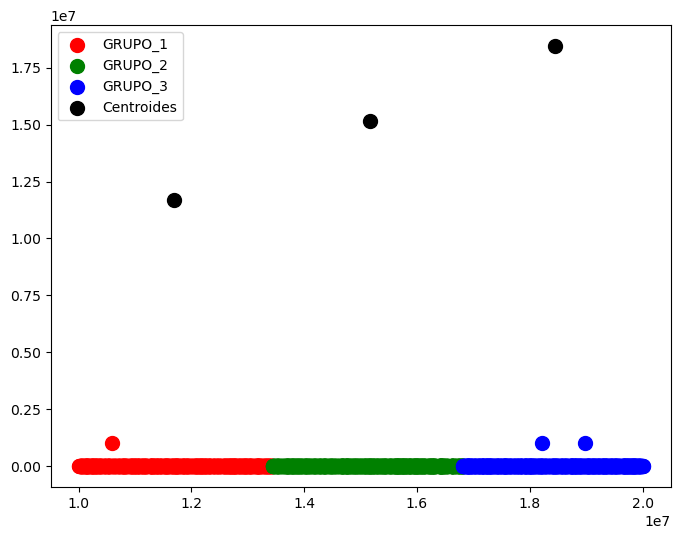

In [22]:
plt.figure(figsize = (8, 6))

plt.scatter(df_ureia_sem_nulos.values[y_ureia == 0, 0], df_ureia_sem_nulos.values[y_ureia == 0, 1], s = 100, c = "red", label = "GRUPO_1")
plt.scatter(df_ureia_sem_nulos.values[y_ureia == 1, 0], df_ureia_sem_nulos.values[y_ureia == 1, 1], s = 100, c = "green", label = "GRUPO_2")
plt.scatter(df_ureia_sem_nulos.values[y_ureia == 2, 0], df_ureia_sem_nulos.values[y_ureia == 2, 1], s = 100, c = "blue", label = "GRUPO_3")

plt.scatter(centros_ureia[:, 0], centros_ureia[:, 0], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

#### Testando com outras quantidades de centroides

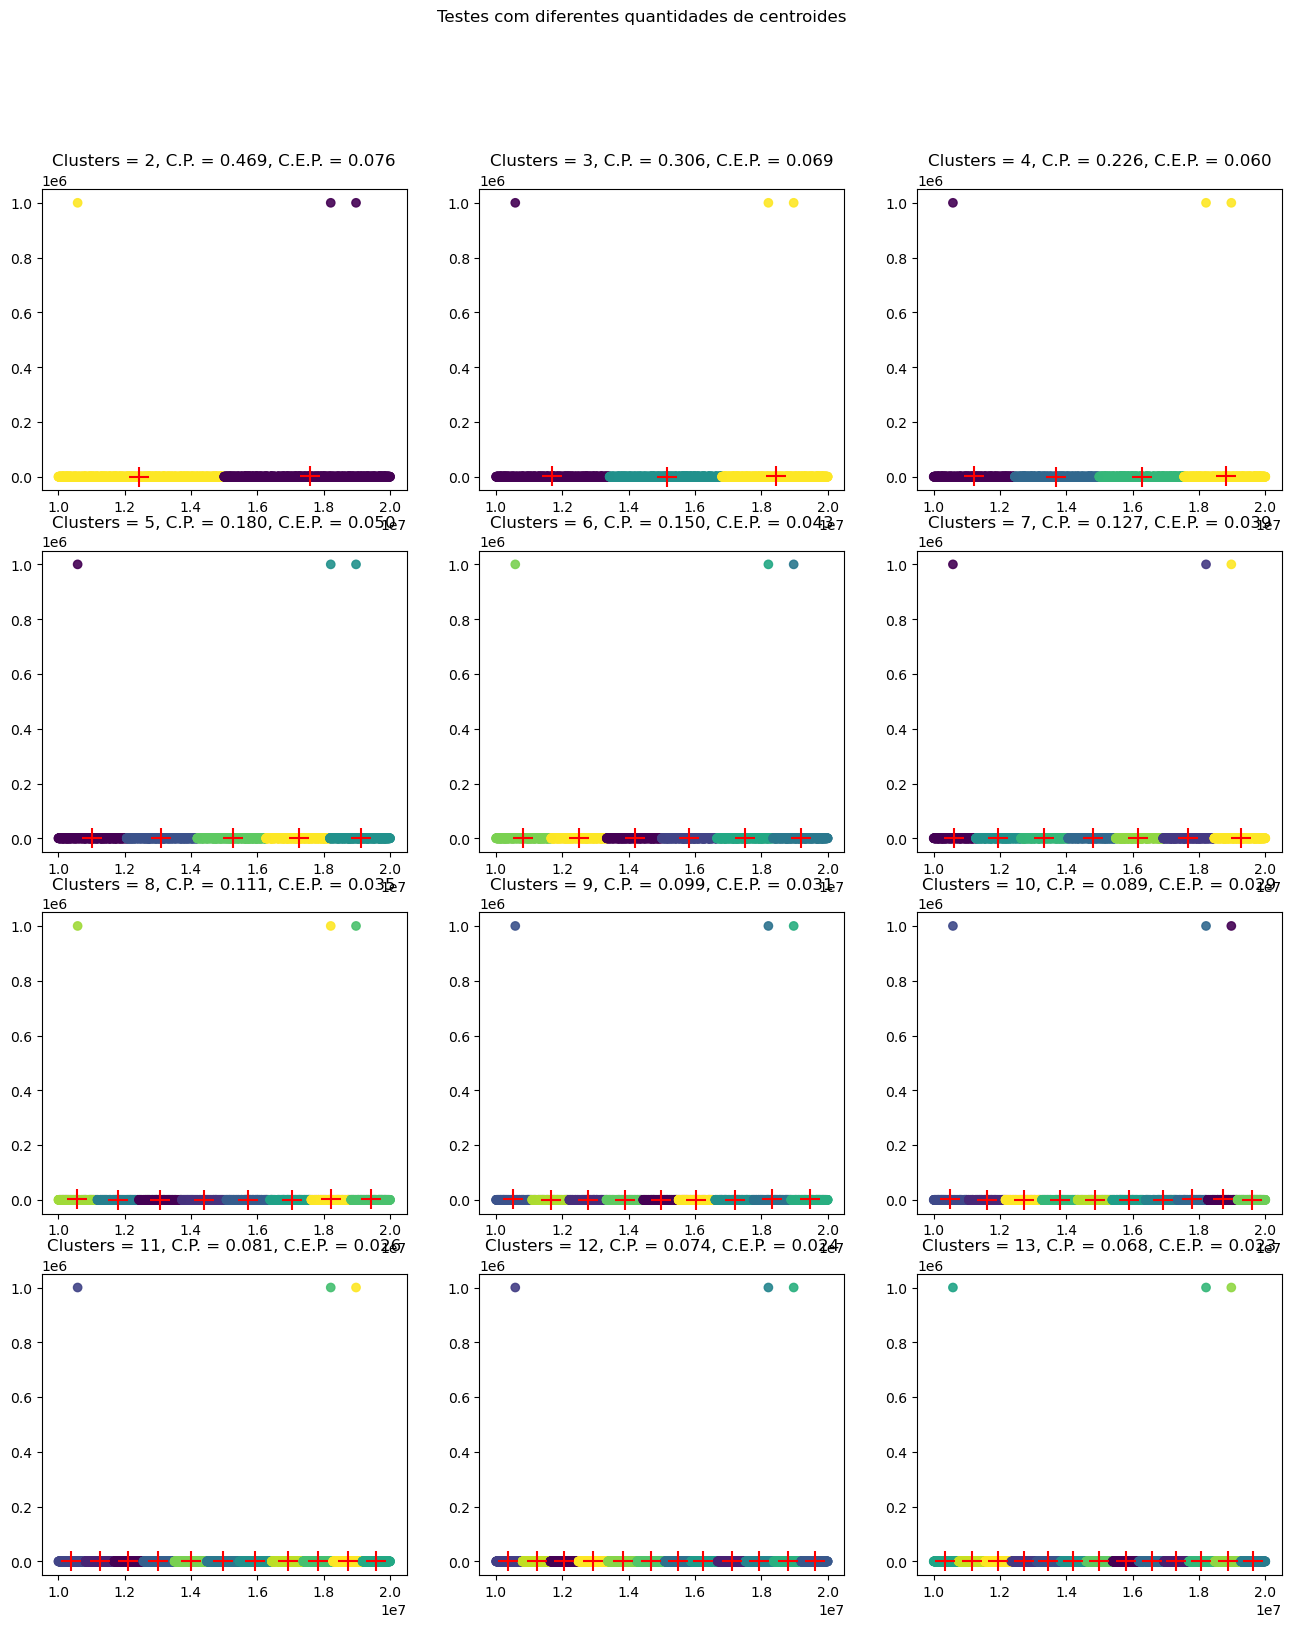

In [24]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 1.5)
    fcmeans.fit(df_ureia_sem_nulos.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_ureia_sem_nulos.values)
    
    eixo.scatter(df_ureia_sem_nulos.values[:,0], df_ureia_sem_nulos.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

### DATASET creatinina

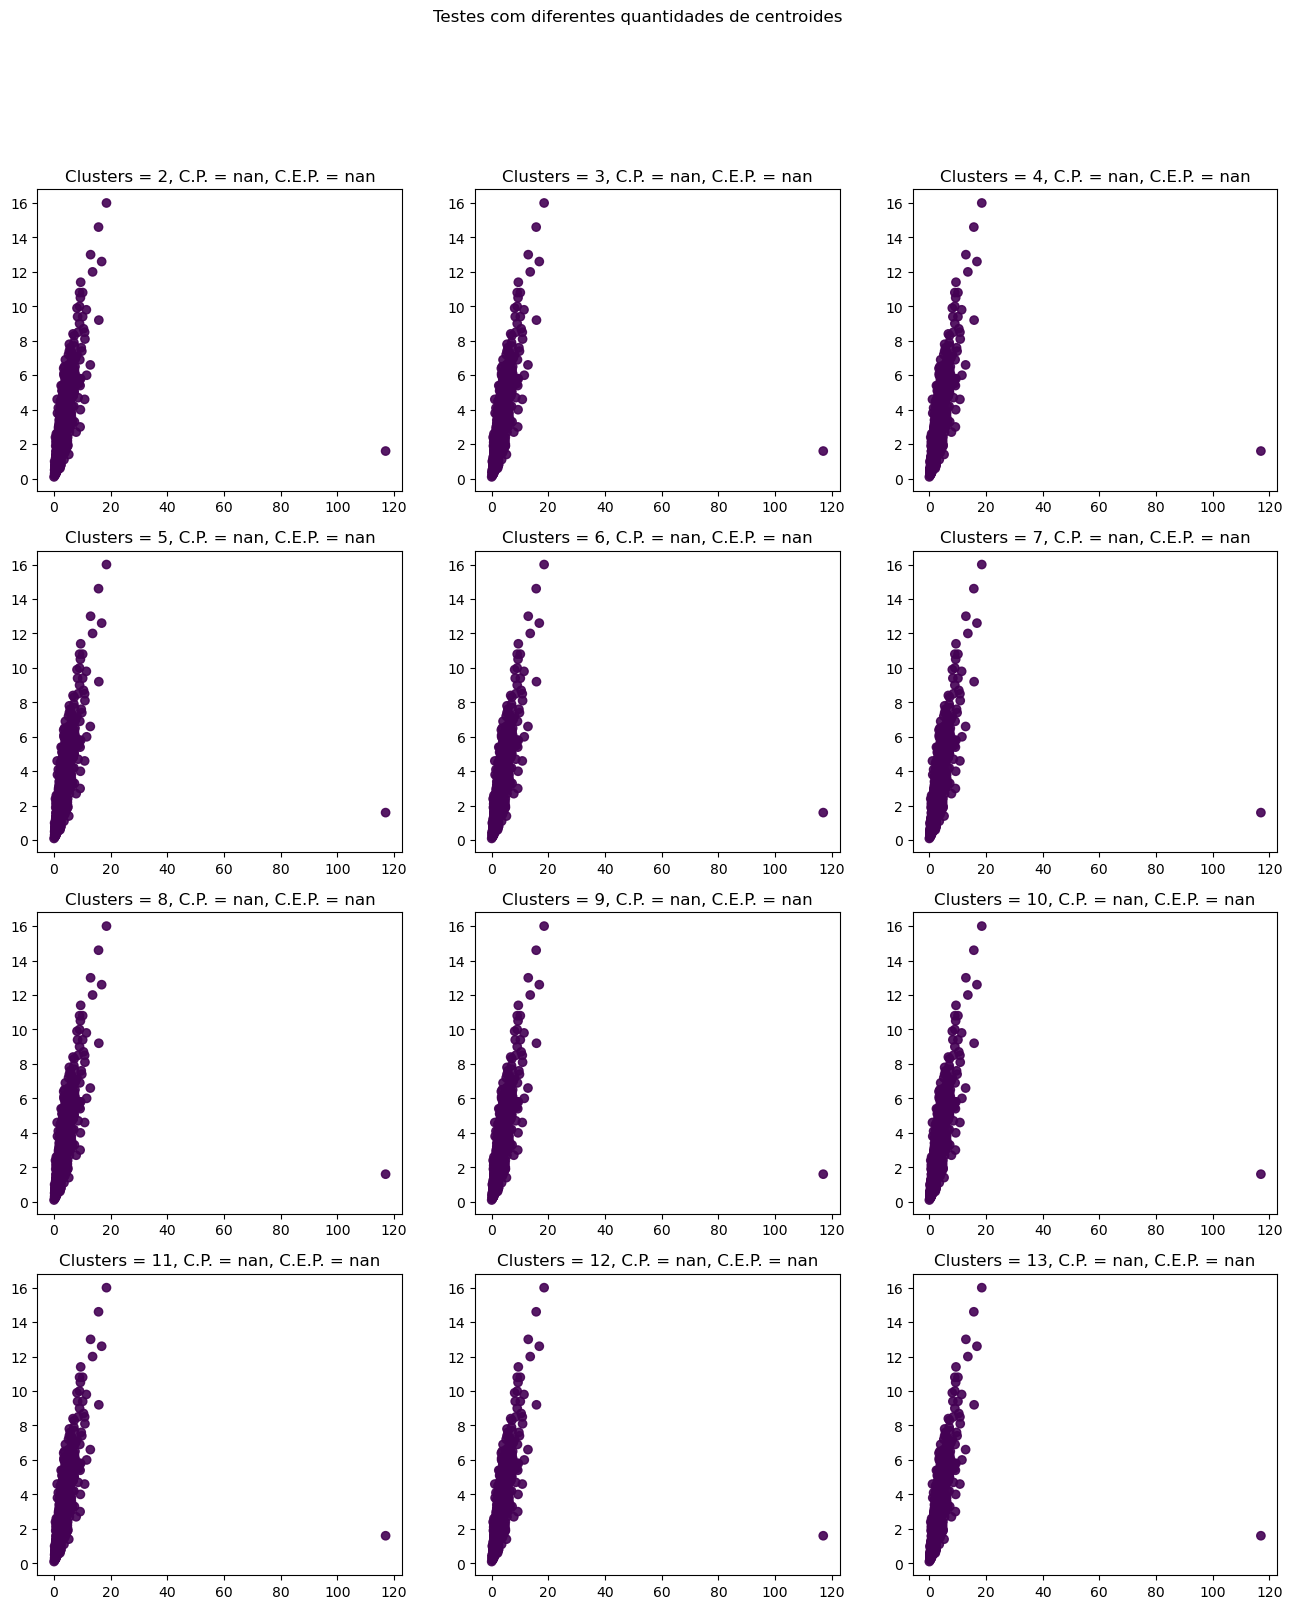

In [12]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(df_creatinina.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_creatinina.values)
    
    eixo.scatter(df_creatinina.values[:,0], df_creatinina.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.500 e C.E.P. = 0.000.

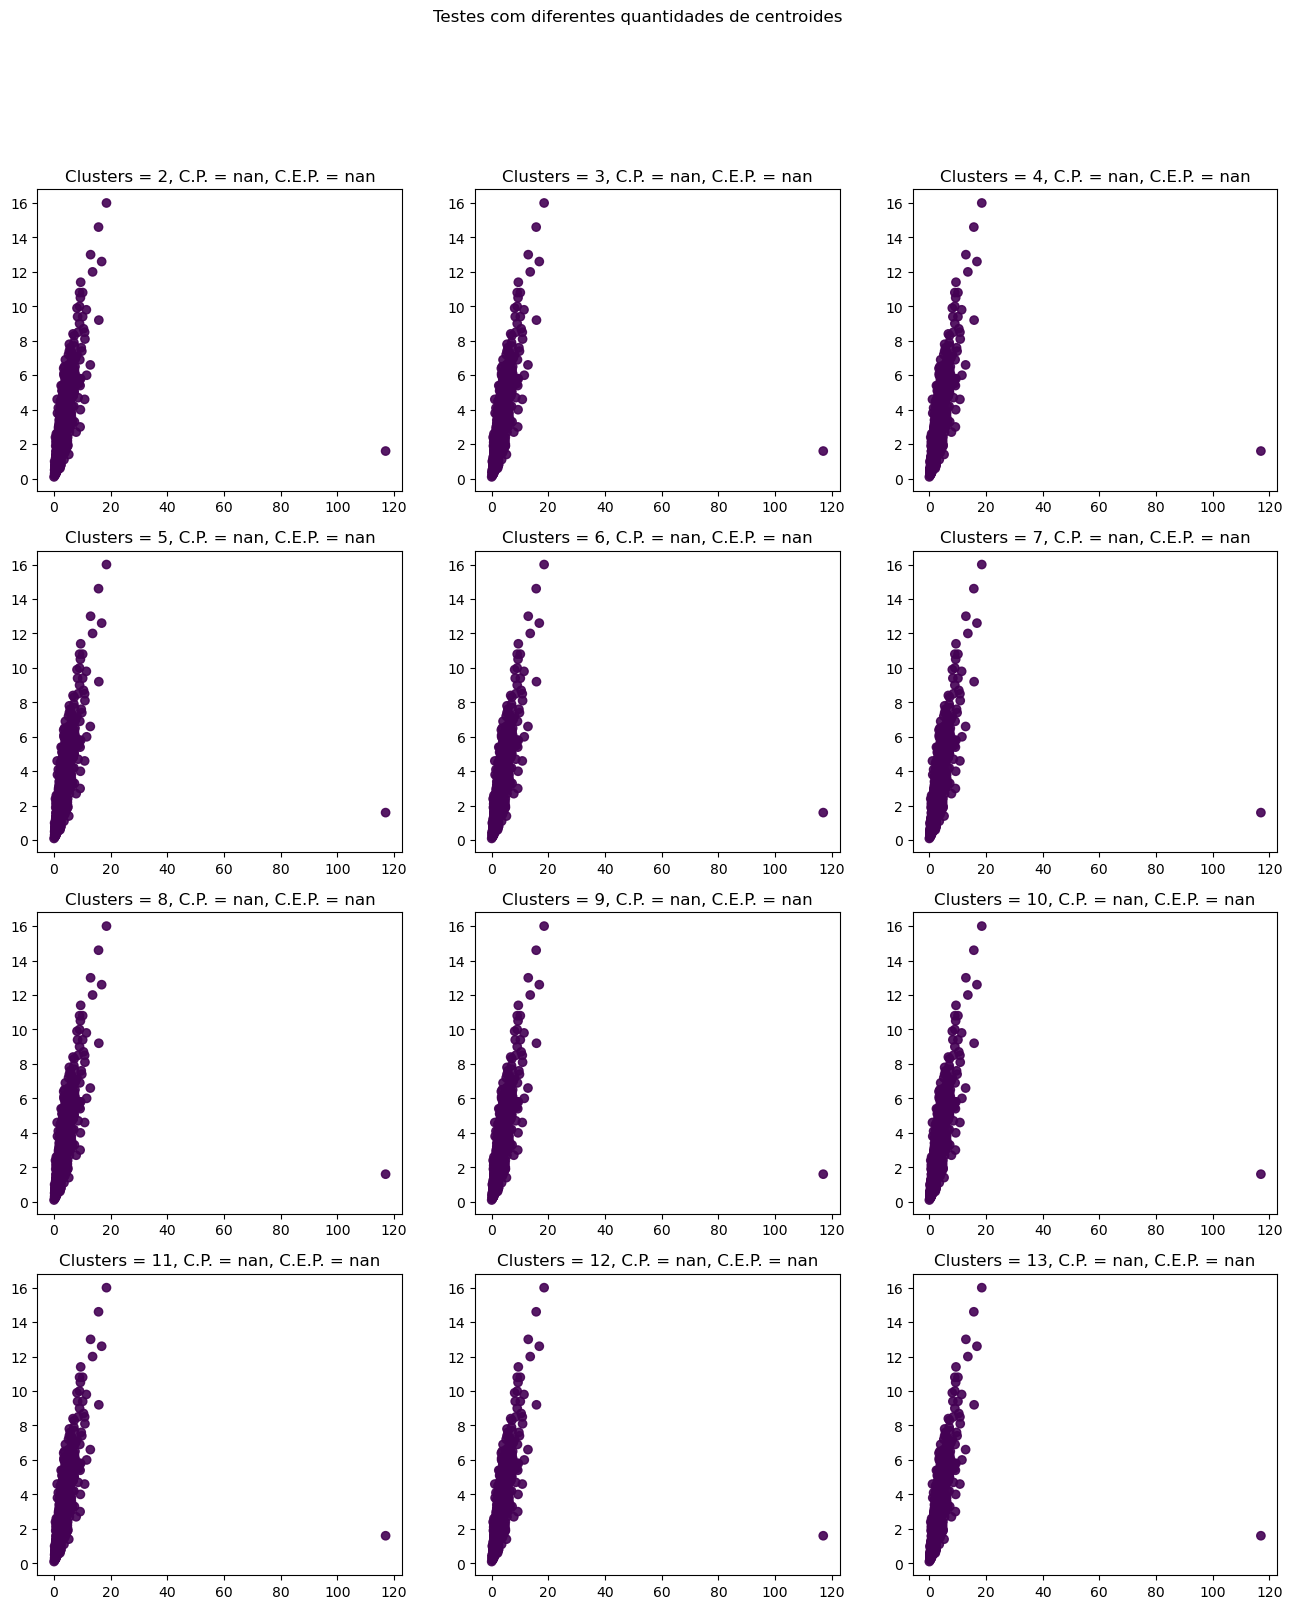

In [13]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(df_creatinina.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_creatinina.values)
    
    eixo.scatter(df_creatinina.values[:,0], df_creatinina.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.479 e C.E.P. = 0.050.

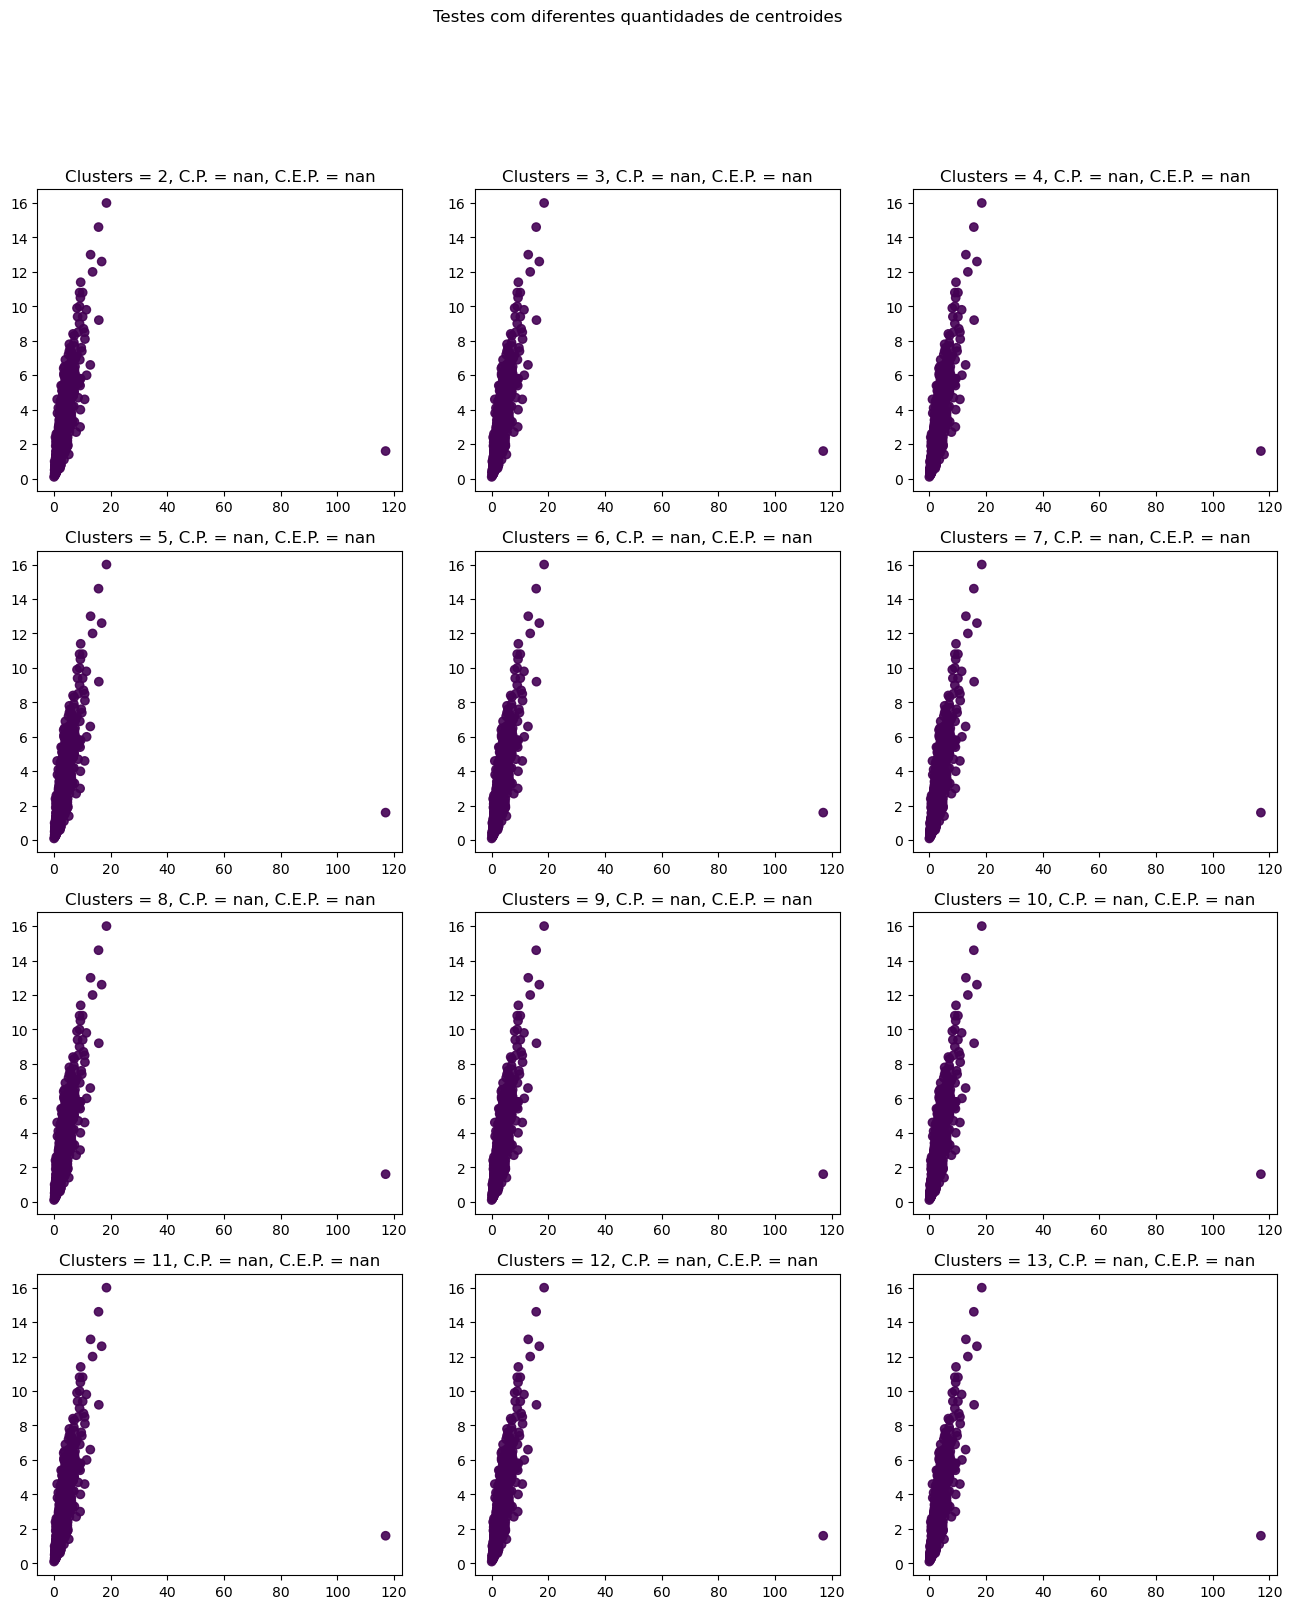

In [14]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_creatinina.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_creatinina.values)
    
    eixo.scatter(df_creatinina.values[:,0], df_creatinina.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.500 e C.E.P. = 0.000.

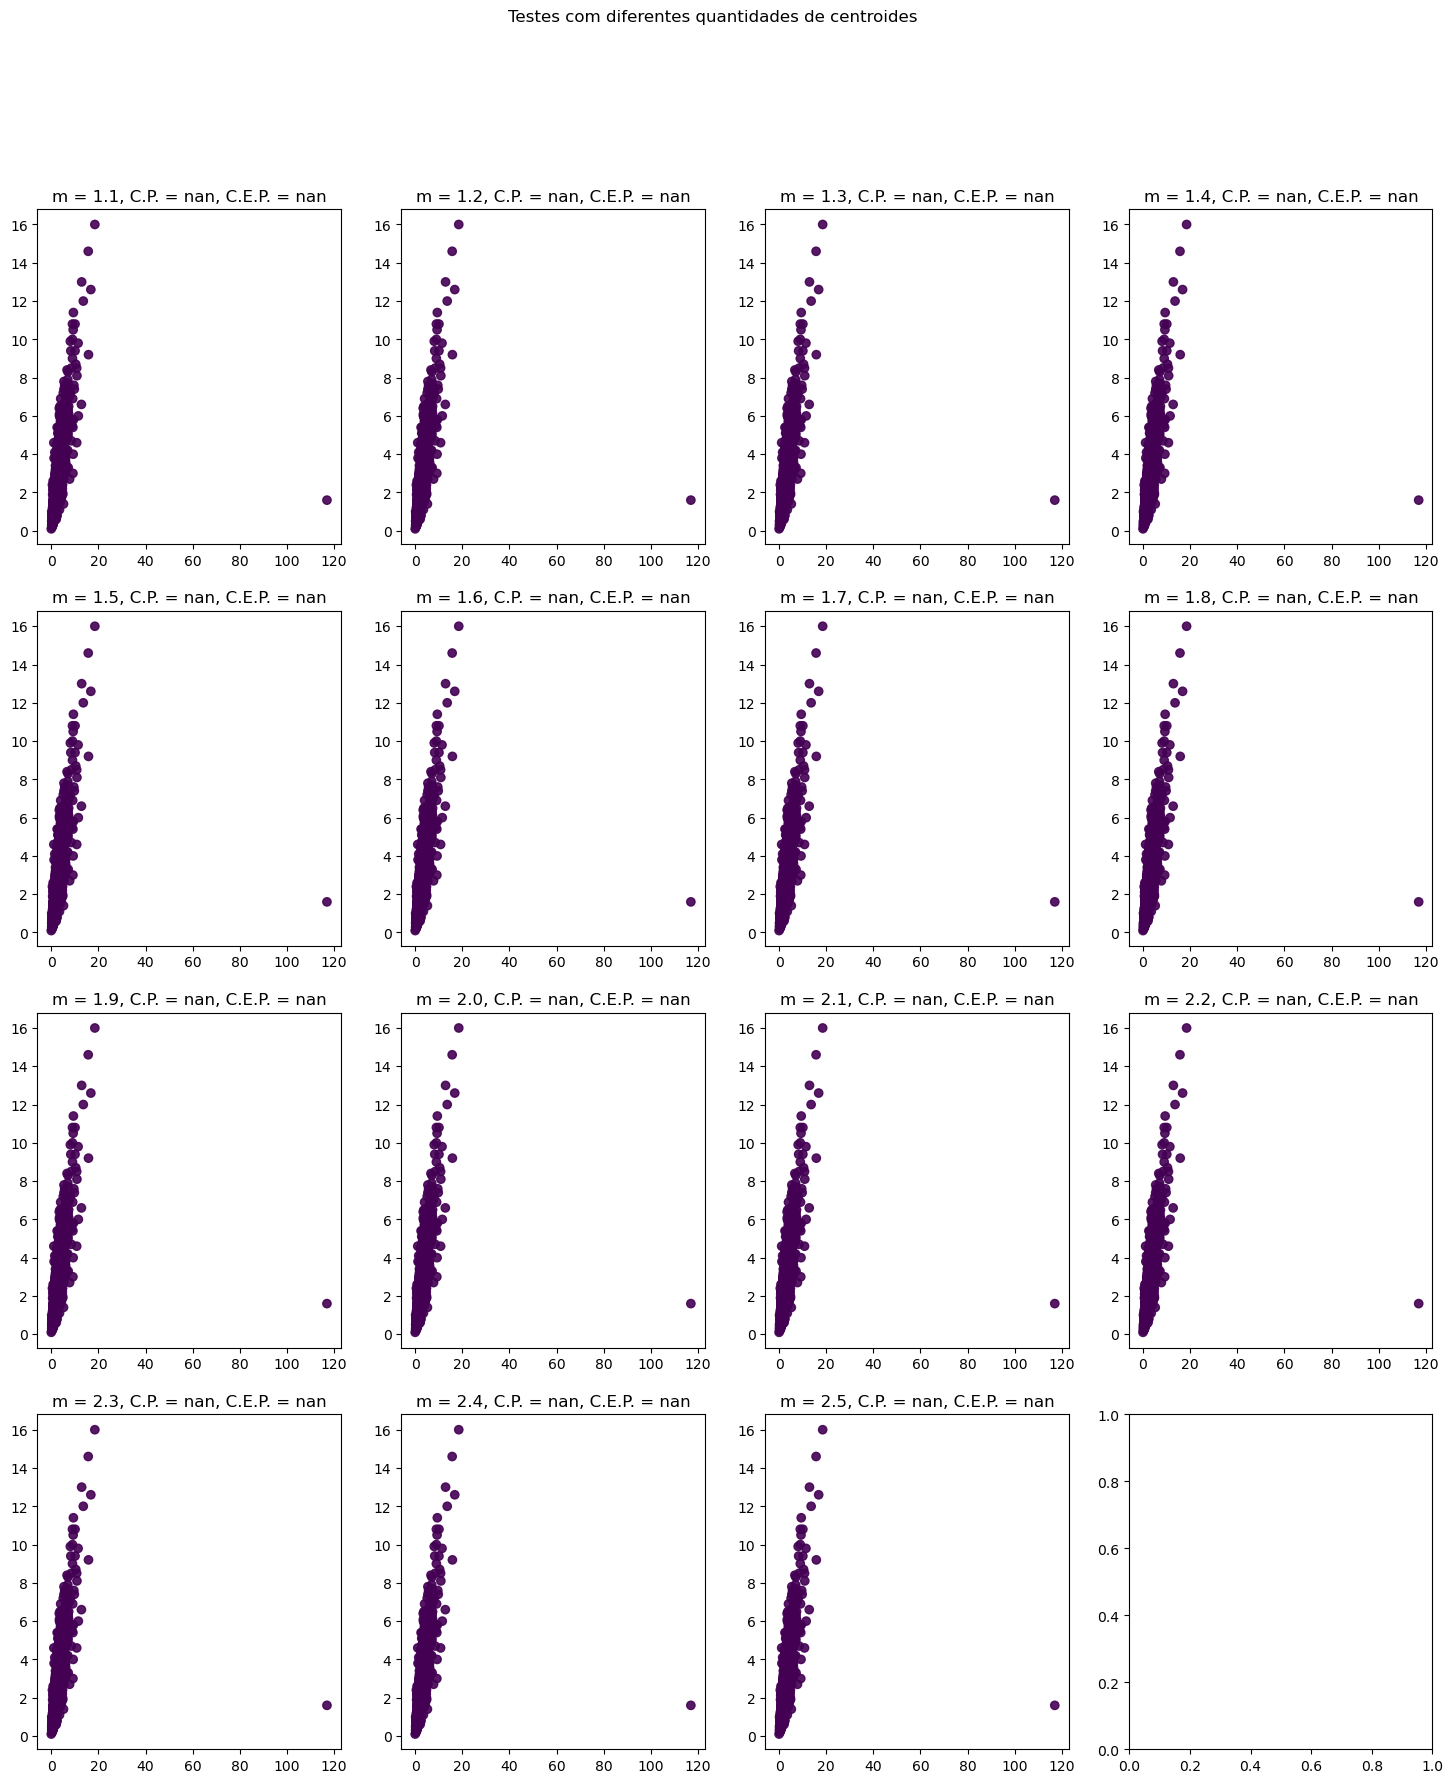

In [15]:
lista_parametros_fuzzy = [round(i, 1) for i in np.arange(1.1, 2.6, 0.1)]
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = parametro_fuzzy,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_creatinina.values)
    modelos.append(fcmeans)
    
qtd_parametro_fuzzy = len(lista_parametros_fuzzy)
linhas = int(np.ceil(np.sqrt(qtd_parametro_fuzzy)))
colunas = int(np.ceil(qtd_parametro_fuzzy / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (18, 20))

for parametro_fuzzy, modelo, eixo in zip(lista_parametros_fuzzy, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_creatinina.values)
    
    eixo.scatter(df_creatinina.values[:,0], df_creatinina.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"m = {parametro_fuzzy}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

Como podemos vez acima, o melhor parâmetro fuzzy é `m = 1.5`, com com C.P. = 0.500 e C.E.P. = 0.000.

### Imprimindo clusteres

In [16]:
fcmeans_creatinina = FCM(n_clusters = 2,
                         random_state = 42,
                         max_iter = 500,
                         distance = "minkowski",
                         m = 1.5,
                         distance_params = {"p": 1.0})
fcmeans_creatinina.fit(df_creatinina.values)
y_creatinina = fcmeans_creatinina.predict(df_creatinina.values)
centros_creatinina = fcmeans_creatinina.centers

In [17]:
np.unique(centros_creatinina)

array([nan])

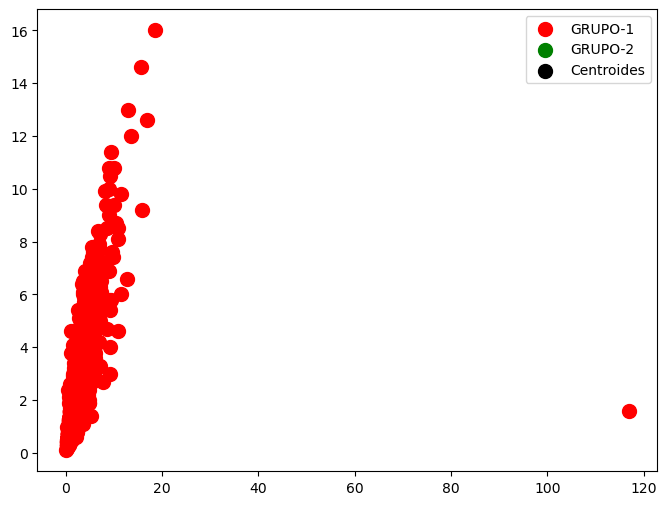

In [18]:
plt.figure(figsize = (8, 6))

### OS PONTOS GERAIS
plt.scatter(df_creatinina.values[y_creatinina == 0, 0], df_creatinina.values[y_creatinina == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(df_creatinina.values[y_creatinina == 1, 0], df_creatinina.values[y_creatinina == 1, 1], s = 100, c = "green", label = "GRUPO-2")

### OS CENTROIDES
plt.scatter(centros_creatinina[:, 0], centros_creatinina[:, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()